In [3]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import csv
import seaborn as sns

In [4]:
df = pd.read_csv("observation-meteorologique-historiques-france-synop0.csv", encoding="utf-8", delimiter = ";")
df.head()

/var/folders/19/5rcz7zl908lfbs167mpp0pbh0000gn/T/ipykernel_79496/3789998320.py:1: DtypeWarning: Columns (62) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("observation-meteorologique-historiques-france-synop0.csv", encoding="utf-8", delimiter = ";")


ID OMM station                       Date  Pression au niveau mer  \
0            7761  2010-01-05T19:00:00+01:00                 99490.0   
1            7790  2010-03-01T16:00:00+01:00                101130.0   
2            7790  2010-02-27T22:00:00+01:00                100990.0   
3            7790  2010-02-28T10:00:00+01:00                100300.0   
4            7790  2010-02-25T16:00:00+01:00                100710.0   

   Variation de pression en 3 heures  Type de tendance barom√©trique  \
0                             -100.0                            7.0   
1                              -50.0                            5.0   
2                             -240.0                            6.0   
3                               70.0                            3.0   
4                              -80.0                            7.0   

   Direction du vent moyen 10 mn  Vitesse du vent moyen 10 mn  Temp√©rature  \
0                           60.0                          1.5       285.05   
1                          330.0                          3.6       285.65   
2                          150.0                          1.5       282.45   
3                          230.0                          2.1       288.95   
4                           30.0                          1.5       288.55   

   Point de ros√©e  Humidit√©  ...  Altitude  communes (name)  communes (code)  \
0          284.15      94.0  ...         5          Ajaccio            2a004   
1          284.25      91.0  ...        10         Lucciana            2b148   
2          280.75      89.0  ...        10         Lucciana            2b148   
3          284.15      73.0  ...        10         Lucciana            2b148   
4          282.85      69.0  ...        10         Lucciana            2b148   

           EPCI (name)  EPCI (code)  department (name)  department (code)  \
0  CA du Pays Ajaccien    242010056       Corse-du-Sud                 2a   
1    CC de Marana-Golo    200036499        Haute-Corse                 2b   
2    CC de Marana-Golo    200036499        Haute-Corse                 2b   
3    CC de Marana-Golo    200036499        Haute-Corse                 2b   
4    CC de Marana-Golo    200036499        Haute-Corse                 2b   

   region (name)  region (code)  mois_de_l_annee  
0          Corse             94                1  
1          Corse             94                3  
2          Corse             94                2  
3          Corse             94                2  
4          Corse             94                2  

[5 rows x 82 columns]

In [5]:
df.head(10)

ID OMM station                       Date  Pression au niveau mer  \
0            7761  2010-01-05T19:00:00+01:00                 99490.0   
1            7790  2010-03-01T16:00:00+01:00                101130.0   
2            7790  2010-02-27T22:00:00+01:00                100990.0   
3            7790  2010-02-28T10:00:00+01:00                100300.0   
4            7790  2010-02-25T16:00:00+01:00                100710.0   
5            7790  2010-02-25T22:00:00+01:00                100580.0   
6            7761  2010-04-28T02:00:00+02:00                102210.0   
7            7790  2010-04-28T08:00:00+02:00                102360.0   
8            7790  2010-04-28T14:00:00+02:00                102370.0   
9            7761  2010-04-27T02:00:00+02:00                101990.0   

   Variation de pression en 3 heures  Type de tendance barom√©trique  \
0                             -100.0                            7.0   
1                              -50.0                            5.0   
2                             -240.0                            6.0   
3                               70.0                            3.0   
4                              -80.0                            7.0   
5                             -120.0                            7.0   
6                               50.0                            1.0   
7                              100.0                            3.0   
8                              -70.0                            8.0   
9                             -100.0                            8.0   

   Direction du vent moyen 10 mn  Vitesse du vent moyen 10 mn  Temp√©rature  \
0                           60.0                          1.5       285.05   
1                          330.0                          3.6       285.65   
2                          150.0                          1.5       282.45   
3                          230.0                          2.1       288.95   
4                           30.0                          1.5       288.55   
5                          250.0                          0.5       281.15   
6                           50.0                          2.6       285.65   
7                          220.0                          1.0       288.45   
8                           20.0                          2.6       296.05   
9                           40.0                          2.6       285.65   

   Point de ros√©e  Humidit√©  ...  Altitude  communes (name)  communes (code)  \
0          284.15      94.0  ...         5          Ajaccio            2a004   
1          284.25      91.0  ...        10         Lucciana            2b148   
2          280.75      89.0  ...        10         Lucciana            2b148   
3          284.15      73.0  ...        10         Lucciana            2b148   
4          282.85      69.0  ...        10         Lucciana            2b148   
5          280.25      94.0  ...        10         Lucciana            2b148   
6          284.75      94.0  ...         5          Ajaccio            2a004   
7          285.75      84.0  ...        10         Lucciana            2b148   
8          284.45      48.0  ...        10         Lucciana            2b148   
9          284.55      93.0  ...         5          Ajaccio            2a004   

           EPCI (name)  EPCI (code)  department (name)  department (code)  \
0  CA du Pays Ajaccien    242010056       Corse-du-Sud                 2a   
1    CC de Marana-Golo    200036499        Haute-Corse                 2b   
2    CC de Marana-Golo    200036499        Haute-Corse                 2b   
3    CC de Marana-Golo    200036499        Haute-Corse                 2b   
4    CC de Marana-Golo    200036499        Haute-Corse                 2b   
5    CC de Marana-Golo    200036499        Haute-Corse                 2b   
6  CA du Pays Ajaccien    242010056       Corse-du-Sud                 2a   
7    CC de Marana-Golo    200036499        Haute-Corse              

In [6]:
df.sort_values(by='ID OMM station', ascending=True).head(10)

ID OMM station                       Date  Pression au niveau mer  \
0                7761  2010-01-05T19:00:00+01:00                 99490.0   
49658            7761  2023-03-04T19:00:00+01:00                101490.0   
49659            7761  2023-04-05T14:00:00+02:00                101510.0   
49661            7761  2023-04-06T05:00:00+02:00                101840.0   
49665            7761  2023-04-04T20:00:00+02:00                101200.0   
49667            7761  2023-04-09T23:00:00+02:00                102180.0   
49669            7761  2023-04-08T14:00:00+02:00                101370.0   
49671            7761  2023-06-07T14:00:00+02:00                101620.0   
49677            7761  2023-06-05T05:00:00+02:00                101460.0   
49678            7761  2021-08-03T17:00:00+02:00                101510.0   

       Variation de pression en 3 heures  Type de tendance barom√©trique  \
0                                 -100.0                            7.0   
49658                               30.0                            3.0   
49659                              -60.0                            8.0   
49661                               30.0                            3.0   
49665                              -10.0                            5.0   
49667                              110.0                            1.0   
49669                             -120.0                            8.0   
49671                              -90.0                            6.0   
49677                              -60.0                            8.0   
49678                              -50.0                            7.0   

       Direction du vent moyen 10 mn  Vitesse du vent moyen 10 mn  \
0                               60.0                          1.5   
49658                           70.0                          1.2   
49659                          230.0                          4.8   
49661                           40.0                          2.9   
49665                           70.0                          1.3   
49667                           40.0                          2.6   
49669                          230.0                          4.2   
49671                          220.0                          5.1   
49677                           90.0                          1.2   
49678                          200.0                          6.5   

       Temp√©rature  Point de ros√©e  Humidit√©  ...  Altitude  communes (name)  \
0           285.05          284.15      94.0  ...         5          Ajaccio   
49658       285.35          279.85      69.0  ...         5          Ajaccio   
49659       289.15          276.85      44.0  ...         5          Ajaccio   
49661       276.55          271.95      72.0  ...         5          Ajaccio   
49665       284.55          278.85      68.0  ...         5          Ajaccio   
49667       282.85          279.15      78.0  ...         5          Ajaccio   
49669       290.65          278.85      46.0  ...         5          Ajaccio   
49671       299.45          289.35      54.0  ...         5          Ajaccio   
49677       290.95          289.25      90.0  ...         5          Ajaccio   
49678       301.55          292.25      57.0  ...         5          Ajaccio   

       communes (code)                                  EPCI (name)  \
0                2a004                          CA du Pays Ajaccien   
49658            2A004  Communaut√© d'agglom√©ration du Pays Ajaccien   
49659            2A004  Communaut√© d'agglom√©ration du Pays Ajaccien   
49661            2A004  Communaut√© d'agglom√©ration du Pays Ajaccien   
49665            2A004  Communaut√© d'agglom√©ration du Pays Ajaccien   
49667            2A004  Communaut√© d'agglom√©ration du Pays Ajaccien   
49669            2A004  Communaut√© d'agglom√©ration du Pays Ajaccien   
49671            2A004  Communaut√© d'agglom√©ration du Pays Ajaccien   
49677            2A004  Communaut√© d'agglom√©

In [7]:
df.sort_values(by='Date', ascending=True).head(10)

ID OMM station                       Date  Pression au niveau mer  \
5865             7790  2010-01-01T01:00:00+01:00                 99400.0   
37590            7761  2010-01-01T01:00:00+01:00                 99610.0   
21341            7790  2010-01-01T04:00:00+01:00                 99160.0   
43479            7761  2010-01-01T04:00:00+01:00                 99290.0   
38087            7761  2010-01-01T07:00:00+01:00                 99310.0   
28204            7790  2010-01-01T07:00:00+01:00                 98990.0   
26583            7790  2010-01-01T10:00:00+01:00                 99130.0   
4258             7761  2010-01-01T10:00:00+01:00                 99470.0   
22273            7761  2010-01-01T13:00:00+01:00                 99480.0   
687              7790  2010-01-01T13:00:00+01:00                 99140.0   

       Variation de pression en 3 heures  Type de tendance barom√©trique  \
5865                               -90.0                            8.0   
37590                              -90.0                            8.0   
21341                             -240.0                            8.0   
43479                             -320.0                            7.0   
38087                               20.0                            0.0   
28204                             -170.0                            7.0   
26583                              140.0                            3.0   
4258                               160.0                            3.0   
22273                               10.0                            1.0   
687                                 10.0                            3.0   

       Direction du vent moyen 10 mn  Vitesse du vent moyen 10 mn  \
5865                           320.0                          2.1   
37590                          200.0                          7.7   
21341                          210.0                          2.1   
43479                          220.0                          9.8   
38087                          250.0                          5.1   
28204                          210.0                          1.5   
26583                          190.0                          2.6   
4258                           260.0                         17.0   
22273                          260.0                         14.4   
687                            240.0                          3.1   

       Temp√©rature  Point de ros√©e  Humidit√©  ...  Altitude  communes (name)  \
5865        282.35          281.85      97.0  ...        10         Lucciana   
37590       287.35          285.75      90.0  ...         5          Ajaccio   
21341       282.95          282.35      96.0  ...        10         Lucciana   
43479       287.45          285.85      90.0  ...         5          Ajaccio   
38087       285.35          280.45      72.0  ...         5          Ajaccio   
28204       283.05          281.15      88.0  ...        10         Lucciana   
26583       283.25          279.75      79.0  ...        10         Lucciana   
4258        284.15          280.85      80.0  ...         5          Ajaccio   
22273       285.45          279.95      69.0  ...         5          Ajaccio   
687         283.15          279.35      77.0  ...        10         Lucciana   

       communes (code)          EPCI (name)  EPCI (code)  department (name)  \
5865             2b148    CC de Marana-Golo    200036499        Haute-Corse   
37590            2a004  CA du Pays Ajaccien    242010056       Corse-du-Sud   
21341            2b148    CC de Marana-Golo    200036499        Haute-Corse   
43479            2a004  CA du Pays Ajaccien    242010056       Corse-du-Sud   
38087            2a004  CA du Pays Ajaccien    242010056       Corse-du-Sud   
28204            2b148    CC de Marana-Golo    200036499        Haute-Corse   
26583            2b148    CC de Marana-Golo    200036499        Haute-Corse   
4258             2a004  CA du Pays Ajaccien    242010056       Cors

In [8]:
df.sort_values(by='Date', ascending=True).tail(10)

ID OMM station                       Date  Pression au niveau mer  \
58330            7790  2025-04-28T08:00:00+02:00                102110.0   
84618            7761  2025-04-28T08:00:00+02:00                102010.0   
84619            7790  2025-04-28T11:00:00+02:00                102180.0   
64701            7761  2025-04-28T11:00:00+02:00                102120.0   
76162            7761  2025-04-28T14:00:00+02:00                102130.0   
74548            7790  2025-04-28T14:00:00+02:00                102180.0   
65936            7790  2025-04-28T17:00:00+02:00                102130.0   
84620            7761  2025-04-28T17:00:00+02:00                102070.0   
73133            7761  2025-04-28T20:00:00+02:00                102070.0   
85416            7790  2025-04-28T20:00:00+02:00                102140.0   

       Variation de pression en 3 heures  Type de tendance barom√©trique  \
58330                               50.0                            3.0   
84618                               30.0                            3.0   
84619                               70.0                            1.0   
64701                              110.0                            3.0   
76162                               10.0                            1.0   
74548                                0.0                            0.0   
65936                              -50.0                            7.0   
84620                              -60.0                            7.0   
73133                                0.0                            5.0   
85416                               10.0                            3.0   

       Direction du vent moyen 10 mn  Vitesse du vent moyen 10 mn  \
58330                          240.0                          1.2   
84618                           40.0                          2.4   
84619                          350.0                          2.2   
64701                          210.0                          3.5   
76162                          200.0                          3.4   
74548                           90.0                          3.3   
65936                           90.0                          2.6   
84620                          200.0                          4.8   
73133                          200.0                          2.5   
85416                          130.0                          1.6   

       Temp√©rature  Point de ros√©e  Humidit√©  ...  Altitude  communes (name)  \
58330       287.95          287.35      96.0  ...        10         Lucciana   
84618       287.55          283.75      78.0  ...         5          Ajaccio   
84619       294.15          288.25      69.0  ...        10         Lucciana   
64701       292.55          286.45      68.0  ...         5          Ajaccio   
76162       292.05          288.15      78.0  ...         5          Ajaccio   
74548       294.95          289.45      71.0  ...        10         Lucciana   
65936       294.25          286.95      63.0  ...        10         Lucciana   
84620       294.65          286.55      60.0  ...         5          Ajaccio   
73133       291.65          286.95      74.0  ...         5          Ajaccio   
85416       290.65          285.75      73.0  ...        10         Lucciana   

       communes (code)                                  EPCI (name)  \
58330            2B148        Communaut√© de communes de Marana-Golo   
84618            2A004  Communaut√© d'agglom√©ration du Pays Ajaccien   
84619            2B148        Communaut√© de communes de Marana-Golo   
64701            2A004  Communaut√© d'agglom√©ration du Pays Ajaccien   
76162            2A004  Communaut√© d'agglom√©ration du Pays Ajaccien   
74548            2B148        Communaut√© de communes de Marana-Golo   
65936            2B148        Communaut√© de communes de Marana-Golo   
84620            2A004  Communaut√© d'agglom√©ration du Pays Ajaccien   
73133            2A004  Communaut√© d'agglom√©ra

In [9]:
df_grouped = df.groupby('ID OMM station').apply(lambda x: x.sort_values('Date')).reset_index(drop=True)
df_grouped.head(10)

/var/folders/19/5rcz7zl908lfbs167mpp0pbh0000gn/T/ipykernel_79496/4088989519.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_grouped = df.groupby('ID OMM station').apply(lambda x: x.sort_values('Date')).reset_index(drop=True)


ID OMM station                       Date  Pression au niveau mer  \
0            7761  2010-01-01T01:00:00+01:00                 99610.0   
1            7761  2010-01-01T04:00:00+01:00                 99290.0   
2            7761  2010-01-01T07:00:00+01:00                 99310.0   
3            7761  2010-01-01T10:00:00+01:00                 99470.0   
4            7761  2010-01-01T13:00:00+01:00                 99480.0   
5            7761  2010-01-01T16:00:00+01:00                 99630.0   
6            7761  2010-01-01T19:00:00+01:00                 99780.0   
7            7761  2010-01-01T22:00:00+01:00                100140.0   
8            7761  2010-01-02T01:00:00+01:00                100450.0   
9            7761  2010-01-02T04:00:00+01:00                100730.0   

   Variation de pression en 3 heures  Type de tendance barom√©trique  \
0                              -90.0                            8.0   
1                             -320.0                            7.0   
2                               20.0                            0.0   
3                              160.0                            3.0   
4                               10.0                            1.0   
5                              150.0                            3.0   
6                              150.0                            2.0   
7                              360.0                            3.0   
8                              310.0                            1.0   
9                              280.0                            3.0   

   Direction du vent moyen 10 mn  Vitesse du vent moyen 10 mn  Temp√©rature  \
0                          200.0                          7.7       287.35   
1                          220.0                          9.8       287.45   
2                          250.0                          5.1       285.35   
3                          260.0                         17.0       284.15   
4                          260.0                         14.4       285.45   
5                          260.0                         15.4       284.45   
6                          270.0                         11.8       284.85   
7                          280.0                         10.8       285.55   
8                          300.0                          4.1       285.15   
9                          260.0                          3.1       284.45   

   Point de ros√©e  Humidit√©  ...  Altitude  communes (name)  communes (code)  \
0          285.75      90.0  ...         5          Ajaccio            2a004   
1          285.85      90.0  ...         5          Ajaccio            2a004   
2          280.45      72.0  ...         5          Ajaccio            2a004   
3          280.85      80.0  ...         5          Ajaccio            2a004   
4          279.95      69.0  ...         5          Ajaccio            2a004   
5          280.55      77.0  ...         5          Ajaccio            2a004   
6          280.95      77.0  ...         5          Ajaccio            2a004   
7          280.25      70.0  ...         5          Ajaccio            2a004   
8          278.55      64.0  ...         5          Ajaccio            2a004   
9          278.55      67.0  ...         5          Ajaccio            2a004   

           EPCI (name)  EPCI (code)  department (name)  department (code)  \
0  CA du Pays Ajaccien    242010056       Corse-du-Sud                 2a   
1  CA du Pays Ajaccien    242010056       Corse-du-Sud                 2a   
2  CA du Pays Ajaccien    242010056       Corse-du-Sud                 2a   
3  CA du Pays Ajaccien    242010056       Corse-du-Sud                 2a   
4  CA du Pays Ajaccien    242010056       Corse-du-Sud                 2a   
5  CA du Pays Ajaccien    242010056       Corse-du-Sud                 2a   
6  CA du Pays Ajaccien    242010056       Corse-du-Sud                 2a   
7  CA du Pays Ajaccien    242010056       Corse-du-Sud              

In [10]:
from datetime import datetime

def parse_date(date_string):
  # Parse the date string, ignoring the timezone offset
  dt = datetime.strptime(date_string[:19], '%Y-%m-%dT%H:%M:%S')
  return dt

df_grouped['Date'] = df_grouped['Date'].apply(parse_date)
df_grouped.head(10)


ID OMM station                Date  Pression au niveau mer  \
0            7761 2010-01-01 01:00:00                 99610.0   
1            7761 2010-01-01 04:00:00                 99290.0   
2            7761 2010-01-01 07:00:00                 99310.0   
3            7761 2010-01-01 10:00:00                 99470.0   
4            7761 2010-01-01 13:00:00                 99480.0   
5            7761 2010-01-01 16:00:00                 99630.0   
6            7761 2010-01-01 19:00:00                 99780.0   
7            7761 2010-01-01 22:00:00                100140.0   
8            7761 2010-01-02 01:00:00                100450.0   
9            7761 2010-01-02 04:00:00                100730.0   

   Variation de pression en 3 heures  Type de tendance barom√©trique  \
0                              -90.0                            8.0   
1                             -320.0                            7.0   
2                               20.0                            0.0   
3                              160.0                            3.0   
4                               10.0                            1.0   
5                              150.0                            3.0   
6                              150.0                            2.0   
7                              360.0                            3.0   
8                              310.0                            1.0   
9                              280.0                            3.0   

   Direction du vent moyen 10 mn  Vitesse du vent moyen 10 mn  Temp√©rature  \
0                          200.0                          7.7       287.35   
1                          220.0                          9.8       287.45   
2                          250.0                          5.1       285.35   
3                          260.0                         17.0       284.15   
4                          260.0                         14.4       285.45   
5                          260.0                         15.4       284.45   
6                          270.0                         11.8       284.85   
7                          280.0                         10.8       285.55   
8                          300.0                          4.1       285.15   
9                          260.0                          3.1       284.45   

   Point de ros√©e  Humidit√©  ...  Altitude  communes (name)  communes (code)  \
0          285.75      90.0  ...         5          Ajaccio            2a004   
1          285.85      90.0  ...         5          Ajaccio            2a004   
2          280.45      72.0  ...         5          Ajaccio            2a004   
3          280.85      80.0  ...         5          Ajaccio            2a004   
4          279.95      69.0  ...         5          Ajaccio            2a004   
5          280.55      77.0  ...         5          Ajaccio            2a004   
6          280.95      77.0  ...         5          Ajaccio            2a004   
7          280.25      70.0  ...         5          Ajaccio            2a004   
8          278.55      64.0  ...         5          Ajaccio            2a004   
9          278.55      67.0  ...         5          Ajaccio            2a004   

           EPCI (name)  EPCI (code)  department (name)  department (code)  \
0  CA du Pays Ajaccien    242010056       Corse-du-Sud                 2a   
1  CA du Pays Ajaccien    242010056       Corse-du-Sud                 2a   
2  CA du Pays Ajaccien    242010056       Corse-du-Sud                 2a   
3  CA du Pays Ajaccien    242010056       Corse-du-Sud                 2a   
4  CA du Pays Ajaccien    242010056       Corse-du-Sud                 2a   
5  CA du Pays Ajaccien    242010056       Corse-du-Sud                 2a   
6  CA du Pays Ajaccien    242010056       Corse-du-Sud                 2a   
7  CA du Pays Ajaccien    242010056       Corse-du-Sud                 2a   
8  CA du Pays Ajaccien    242010056       Corse-du-Sud              

In [11]:
df_7761 = df[df['ID OMM station'] == 7761]
df_7790 = df[df['ID OMM station'] == 7790]

In [12]:
df_7761['Date'] = pd.to_datetime(df_7761['Date'], utc=True)
df_7790['Date'] = pd.to_datetime(df_7790['Date'], utc=True)

monthly_avg_temp_7761 = df_7761.resample('M', on='Date')['Temp√©rature (¬∞C)'].mean()
monthly_avg_temp_7790 = df_7790.resample('M', on='Date')['Temp√©rature (¬∞C)'].mean()

print("Monthly average temperatures (7761):\n", monthly_avg_temp_7761)
print("\nMonthly average temperatures (7790):\n", monthly_avg_temp_7790)

Monthly average temperatures (7761):
 Date
2010-01-31 00:00:00+00:00     8.587097
2010-02-28 00:00:00+00:00     9.345536
2010-03-31 00:00:00+00:00    10.473684
2010-04-30 00:00:00+00:00    13.447917
2010-05-31 00:00:00+00:00    16.594758
                               ...    
2024-12-31 00:00:00+00:00     9.511618
2025-01-31 00:00:00+00:00    10.895565
2025-02-28 00:00:00+00:00    10.985650
2025-03-31 00:00:00+00:00    12.800403
2025-04-30 00:00:00+00:00    15.079279
Freq: ME, Name: Temp√©rature (¬∞C), Length: 184, dtype: float64

Monthly average temperatures (7790):
 Date
2010-01-31 00:00:00+00:00     7.788664
2010-02-28 00:00:00+00:00     9.087946
2010-03-31 00:00:00+00:00    10.088211
2010-04-30 00:00:00+00:00    13.820085
2010-05-31 00:00:00+00:00    16.817143
                               ...    
2024-12-31 00:00:00+00:00    10.023318
2025-01-31 00:00:00+00:00    10.673387
2025-02-28 00:00:00+00:00    10.825561
2025-03-31 00:00:00+00:00    11.790612
2025-04-30 00:00:00+00:00    1

/var/folders/19/5rcz7zl908lfbs167mpp0pbh0000gn/T/ipykernel_79496/2874858100.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_7761['Date'] = pd.to_datetime(df_7761['Date'], utc=True)
/var/folders/19/5rcz7zl908lfbs167mpp0pbh0000gn/T/ipykernel_79496/2874858100.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_7790['Date'] = pd.to_datetime(df_7790['Date'], utc=True)
/var/folders/19/5rcz7zl908lfbs167mpp0pbh0000gn/T/ipykernel_79496/2874858100.py:4: FutureWarning: 'M' is deprecated and will be removed i

In [13]:
# √ñnceki s√ºtunlarƒ± saklayalƒ±m
columns_before_7761 = df_7761.columns.tolist()
columns_before_7790 = df_7790.columns.tolist()
columns_to_drop = [
    'ID OMM station', 'Coordonnees', 'Nom',
    'communes (name)', 'communes (code)',
    'EPCI (name)', 'EPCI (code)',
    'department (name)', 'department (code)',
    'region (name)', 'region (code)', 'mois_de_l_annee',
    'Temp√©rature minimale sur 12 heures', 'Temp√©rature minimale sur 24 heures',
    'Temp√©rature maximale sur 12 heures', 'Temp√©rature maximale sur 24 heures',
    'Temp√©rature minimale du sol sur 12 heures',
    "Type des nuages de l'√©tage inf√©rieur", "Type des nuages de l'√©tage moyen",
    "Type des nuages de l'√©tage sup√©rieur", "N√©bulosit√© couche nuageuse 1", 
    "N√©bulosit√© couche nuageuse 2", "N√©bulosit√© couche nuageuse 3", "N√©bulosit√© couche nuageuse 4",
    "Pr√©cipitations dans la derni√®re heure", "Pr√©cipitations dans les 3 derni√®res heures", "Pr√©cipitations dans les 6 derni√®res heures",
    "Pr√©cipitations dans les 12 derni√®res heures", "Pr√©cipitations dans les 24 derni√®res heures", "Ph√©nom√®ne sp√©cial 1",
    "Ph√©nom√®ne sp√©cial 2", "Ph√©nom√®ne sp√©cial 3", "Ph√©nom√®ne sp√©cial 4" , "Type nuage 1", "Type nuage 2",
    "Type nuage 3", "Type nuage 4","Rafale sur les 10 derni√®res minutes","Periode de mesure de la rafale",
    "Periode de mesure de la neige fraiche","Hauteur totale de la couche de neige, glace, autre au sol", "Temp√©rature du thermom√®tre mouill√©",
    "M√©thode de mesure Temp√©rature du thermom√®tre mouill√©", "Hauteur de base 2", "Hauteur de base 1", "Hauteur de base 3","Temp√©rature maximale sur 24 heures (¬∞C)",
    "Temp√©rature minimale sur 24 heures (¬∞C)", "Etat du sol", 'Temps pass√© 1', 'Temps pass√© 2',
    "N√©bulosit√©  des nuages de l' √©tage inf√©rieur",
    "Hauteur de la base des nuages de l'√©tage inf√©rieur",
    'Niveau barom√©trique', 'G√©opotentiel',
    'Variation de pression en 24 heures',
    'Hauteur de la neige fra√Æche', 'Ph√©nom√®ne sp√©cial 1',
    'Hauteur de base 4',
    'Temps pass√© 1.1', 'Temps pr√©sent.1', 'Type de tendance barom√©trique.1'
    
]



# Silme i≈ülemini yapalƒ±m
df_7761.drop(columns=columns_to_drop, inplace=True, errors='ignore')
df_7790.drop(columns=columns_to_drop, inplace=True, errors='ignore')

# Silinen s√ºtunlarƒ± kar≈üƒ±la≈ütƒ±ralƒ±m
dropped_columns_7761 = [col for col in columns_to_drop if col in columns_before_7761 and col not in df_7761.columns]
dropped_columns_7790 = [col for col in columns_to_drop if col in columns_before_7790 and col not in df_7790.columns]

# Silinen s√ºtunlarƒ± yazdƒ±ralƒ±m
print("Silinen s√ºtunlar df_7761 i√ßin:")
print(dropped_columns_7761)

print("Silinen s√ºtunlar df_7790 i√ßin:")
print(dropped_columns_7790)



Silinen s√ºtunlar df_7761 i√ßin:
['ID OMM station', 'Coordonnees', 'Nom', 'communes (name)', 'communes (code)', 'EPCI (name)', 'EPCI (code)', 'department (name)', 'department (code)', 'region (name)', 'region (code)', 'mois_de_l_annee', 'Temp√©rature minimale sur 12 heures', 'Temp√©rature minimale sur 24 heures', 'Temp√©rature maximale sur 12 heures', 'Temp√©rature maximale sur 24 heures', 'Temp√©rature minimale du sol sur 12 heures', "Type des nuages de l'√©tage inf√©rieur", "Type des nuages de l'√©tage moyen", "Type des nuages de l'√©tage sup√©rieur", 'N√©bulosit√© couche nuageuse 1', 'N√©bulosit√© couche nuageuse 2', 'N√©bulosit√© couche nuageuse 3', 'N√©bulosit√© couche nuageuse 4', 'Pr√©cipitations dans la derni√®re heure', 'Pr√©cipitations dans les 3 derni√®res heures', 'Pr√©cipitations dans les 6 derni√®res heures', 'Pr√©cipitations dans les 12 derni√®res heures', 'Pr√©cipitations dans les 24 derni√®res heures', 'Ph√©nom√®ne sp√©cial 1', 'Ph√©nom√®ne sp√©cial 2', 'Ph√©nom√®ne sp

/var/folders/19/5rcz7zl908lfbs167mpp0pbh0000gn/T/ipykernel_79496/841594225.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_7761.drop(columns=columns_to_drop, inplace=True, errors='ignore')
/var/folders/19/5rcz7zl908lfbs167mpp0pbh0000gn/T/ipykernel_79496/841594225.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_7790.drop(columns=columns_to_drop, inplace=True, errors='ignore')


In [14]:
print("df_7761:  ")
print(df_7761.columns)
print(df_7761.info())
print("------------------")
print("df_7790:  ")
print(df_7790.columns)
print(df_7790.info())


df_7761:  
Index(['Date', 'Pression au niveau mer', 'Variation de pression en 3 heures',
       'Type de tendance barom√©trique', 'Direction du vent moyen 10 mn',
       'Vitesse du vent moyen 10 mn', 'Temp√©rature', 'Point de ros√©e',
       'Humidit√©', 'Visibilit√© horizontale', 'Temps pr√©sent',
       'Nebulosit√© totale', 'Pression station', 'Rafales sur une p√©riode',
       'Temp√©rature (¬∞C)', 'Temp√©rature minimale sur 12 heures (¬∞C)',
       'Temp√©rature maximale sur 12 heures (¬∞C)',
       'Temp√©rature minimale du sol sur 12 heures (en ¬∞C)', 'Latitude',
       'Longitude', 'Altitude'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Index: 44680 entries, 0 to 89326
Data columns (total 21 columns):
 #   Column                                             Non-Null Count  Dtype              
---  ------                                             --------------  -----              
 0   Date                                               44680 non-null  datetim

In [15]:
df_7761.drop(["Temp√©rature minimale sur 12 heures (¬∞C)", "Temp√©rature maximale sur 12 heures (¬∞C)"], inplace=True, axis=1)
df_7790.drop(["Temp√©rature minimale sur 12 heures (¬∞C)", "Temp√©rature maximale sur 12 heures (¬∞C)"], inplace=True, axis=1)

/var/folders/19/5rcz7zl908lfbs167mpp0pbh0000gn/T/ipykernel_79496/1576462196.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_7761.drop(["Temp√©rature minimale sur 12 heures (¬∞C)", "Temp√©rature maximale sur 12 heures (¬∞C)"], inplace=True, axis=1)
/var/folders/19/5rcz7zl908lfbs167mpp0pbh0000gn/T/ipykernel_79496/1576462196.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_7790.drop(["Temp√©rature minimale sur 12 heures (¬∞C)", "Temp√©rature maximale sur 12 heures (¬∞C)"], inplace=True, axis=1)


In [16]:
df_7761["Temps pr√©sent"].nunique()

51

/var/folders/19/5rcz7zl908lfbs167mpp0pbh0000gn/T/ipykernel_79496/773568314.py:15: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7761 = df_7761.resample('M', on='Date')[col].mean()
/var/folders/19/5rcz7zl908lfbs167mpp0pbh0000gn/T/ipykernel_79496/773568314.py:16: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7790 = df_7790.resample('M', on='Date')[col].mean()


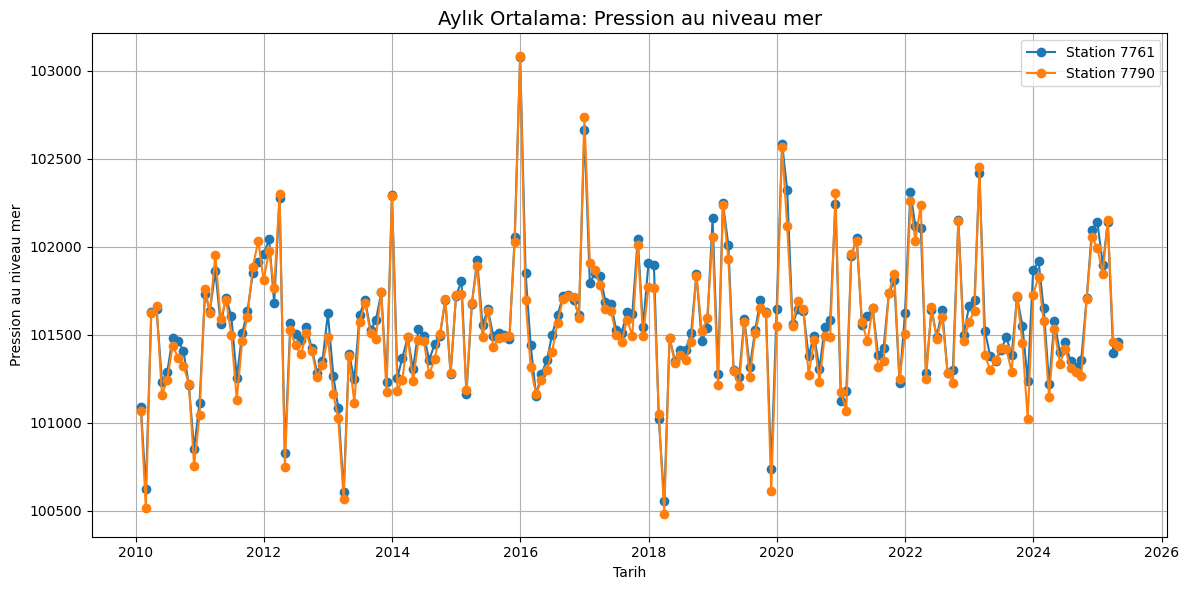

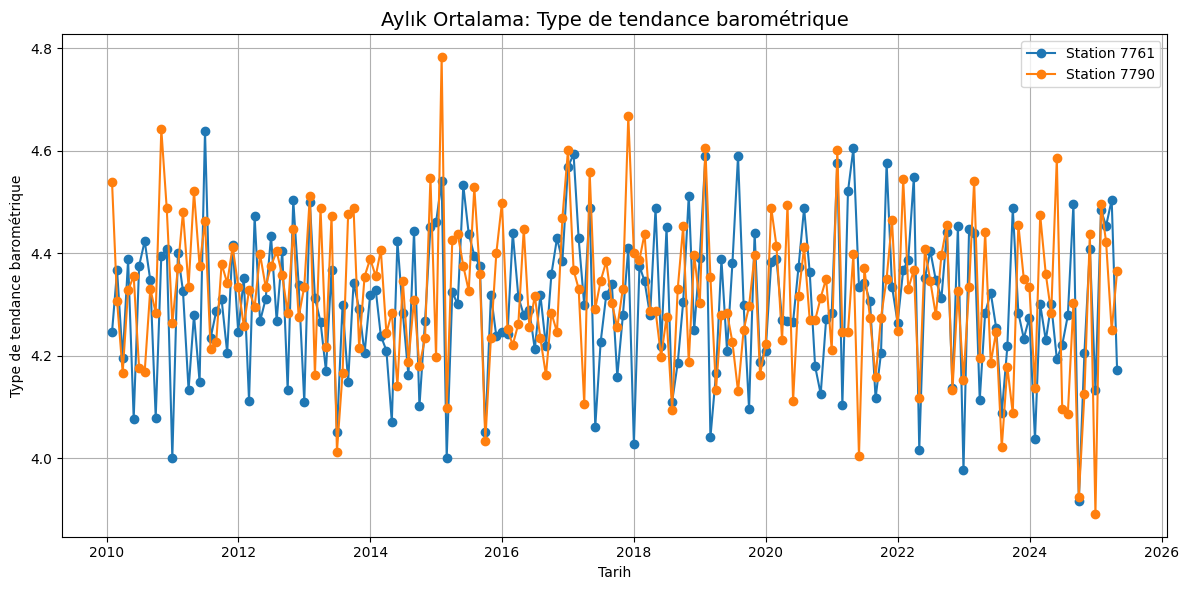

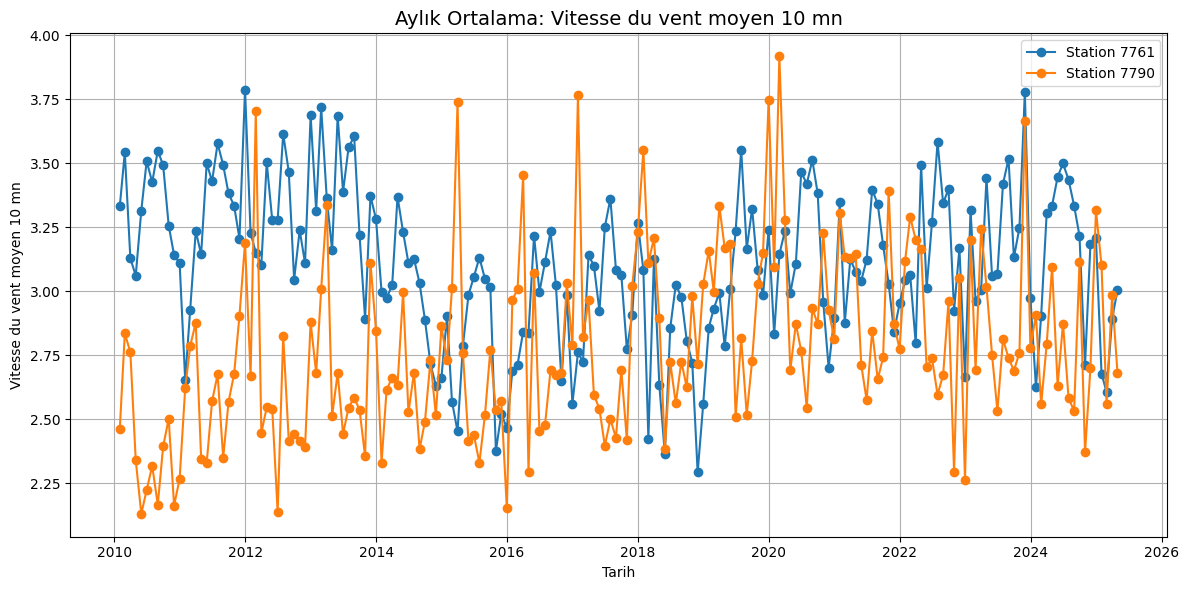

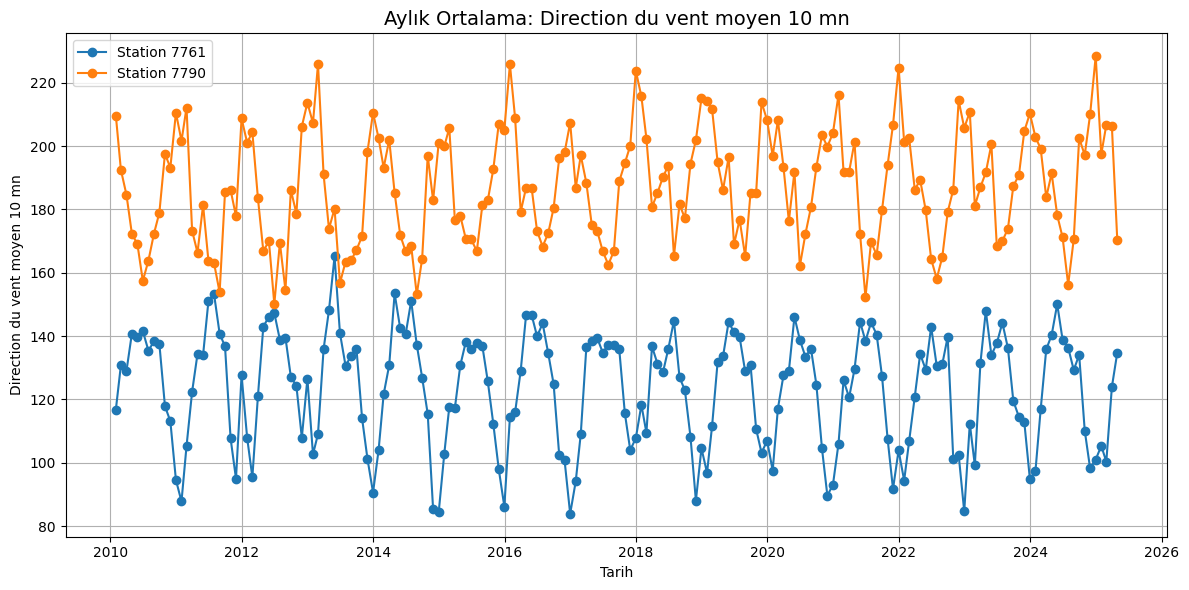

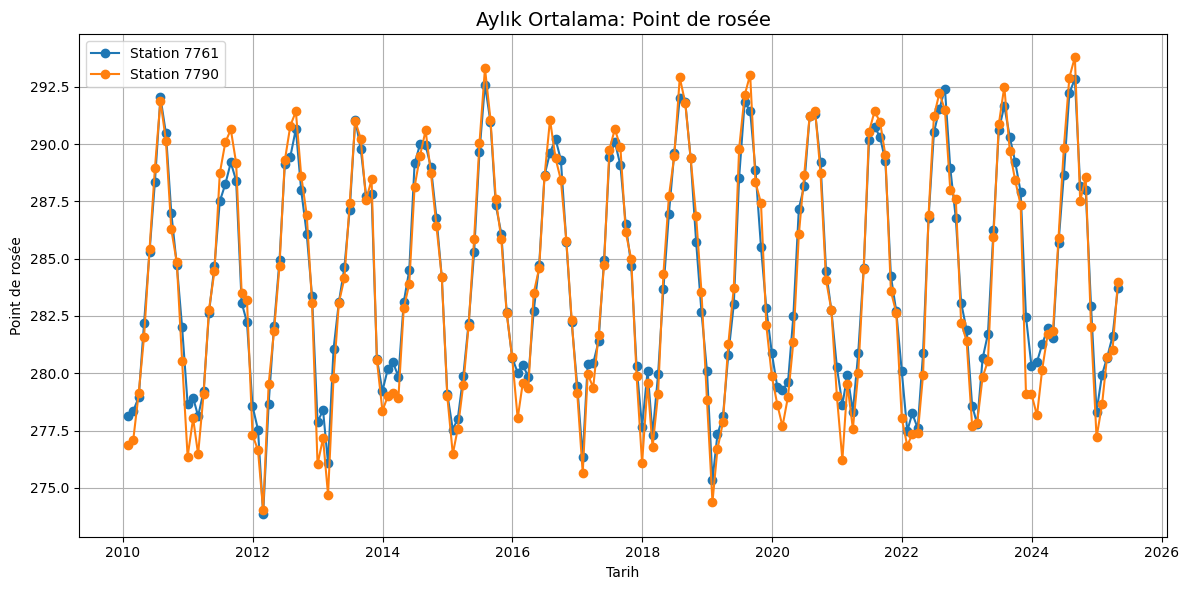

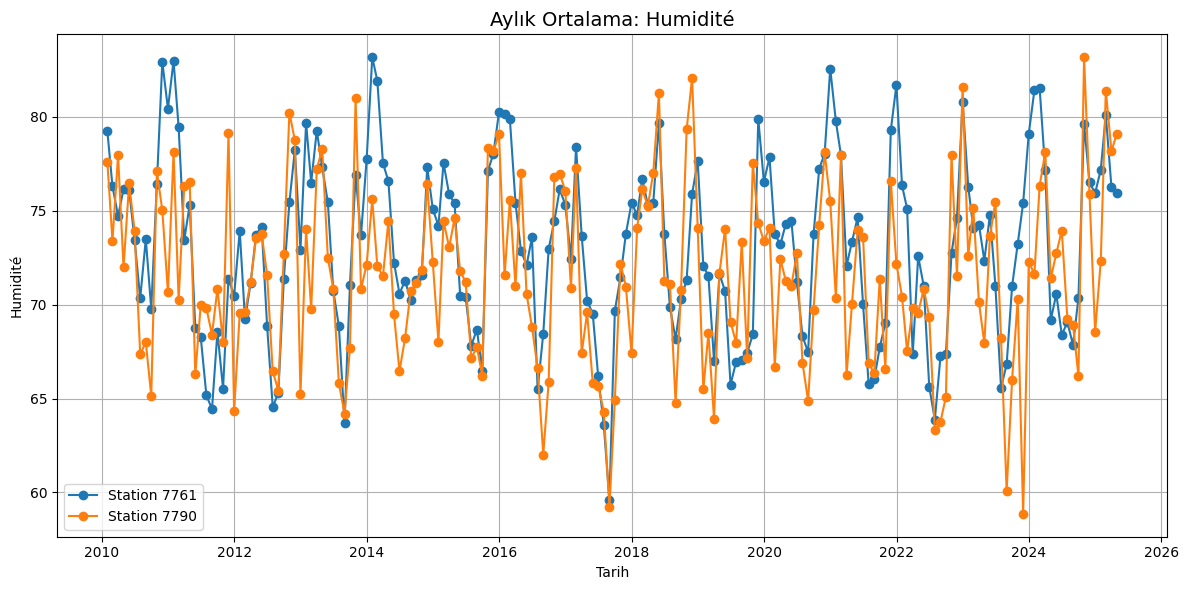

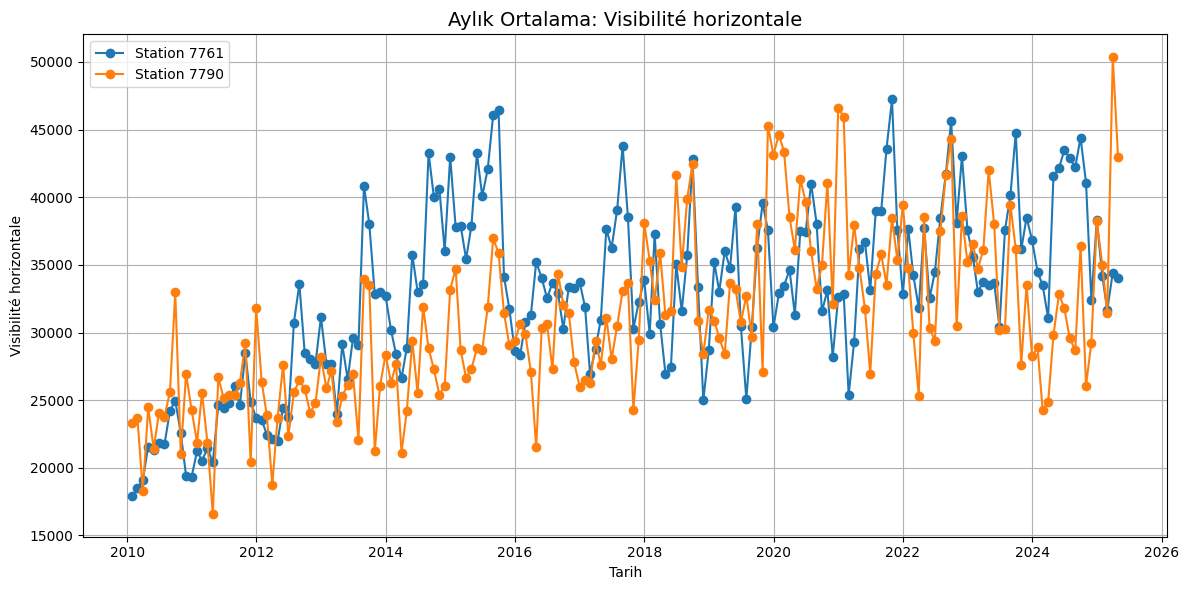

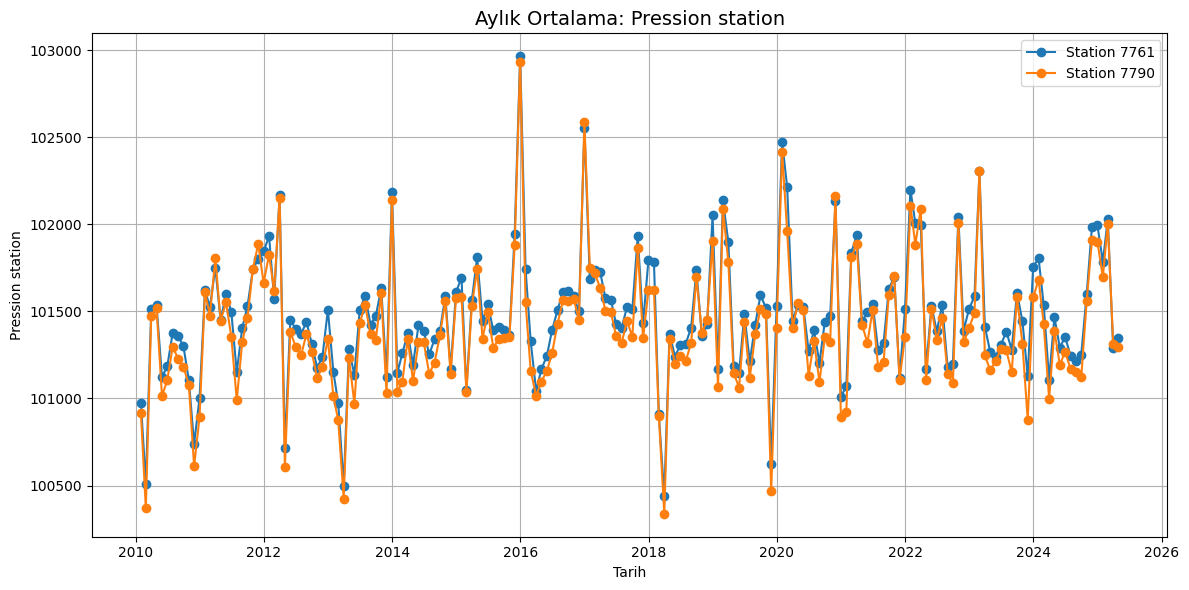

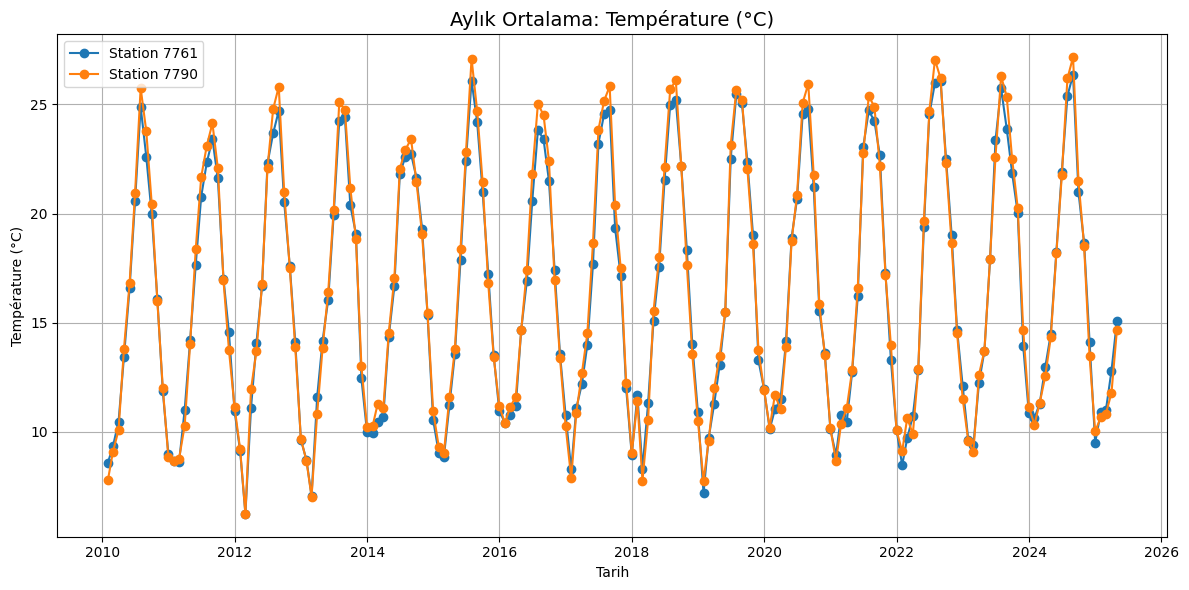

In [17]:
import matplotlib.pyplot as plt

# List of numerical columns to compare
numerical_cols = [
    'Pression au niveau mer', 'Type de tendance barom√©trique',
    'Vitesse du vent moyen 10 mn', 'Direction du vent moyen 10 mn',
    'Point de ros√©e', "Humidit√©", "Visibilit√© horizontale", 
    "Pression station", "Temp√©rature (¬∞C)" 
]

# Iterate through the numerical columns and create plots
for col in numerical_cols:
    try:
        # Calculate monthly averages, ignoring NaNs
        monthly_avg_7761 = df_7761.resample('M', on='Date')[col].mean()
        monthly_avg_7790 = df_7790.resample('M', on='Date')[col].mean()

        # Create plot
        fig, ax = plt.subplots(figsize=(12, 6))
        ax.plot(monthly_avg_7761.index, monthly_avg_7761, label='Station 7761', marker='o')
        ax.plot(monthly_avg_7790.index, monthly_avg_7790, label='Station 7790', marker='o')

        # Labels and title
        ax.set_title(f'Aylƒ±k Ortalama: {col}', fontsize=14)
        ax.set_xlabel('Tarih')
        ax.set_ylabel(col)
        ax.legend()
        ax.grid(True)

        # Show plot
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"Hata olu≈ütu: {col} s√ºtunu i≈ülenemedi. Detay: {e}")


/var/folders/19/5rcz7zl908lfbs167mpp0pbh0000gn/T/ipykernel_79496/3923713018.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_humidity_7761 = df_7761.resample('M', on='Date')['Humidit√©'].mean()
/var/folders/19/5rcz7zl908lfbs167mpp0pbh0000gn/T/ipykernel_79496/3923713018.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_humidity_7790 = df_7790.resample('M', on='Date')['Humidit√©'].mean()


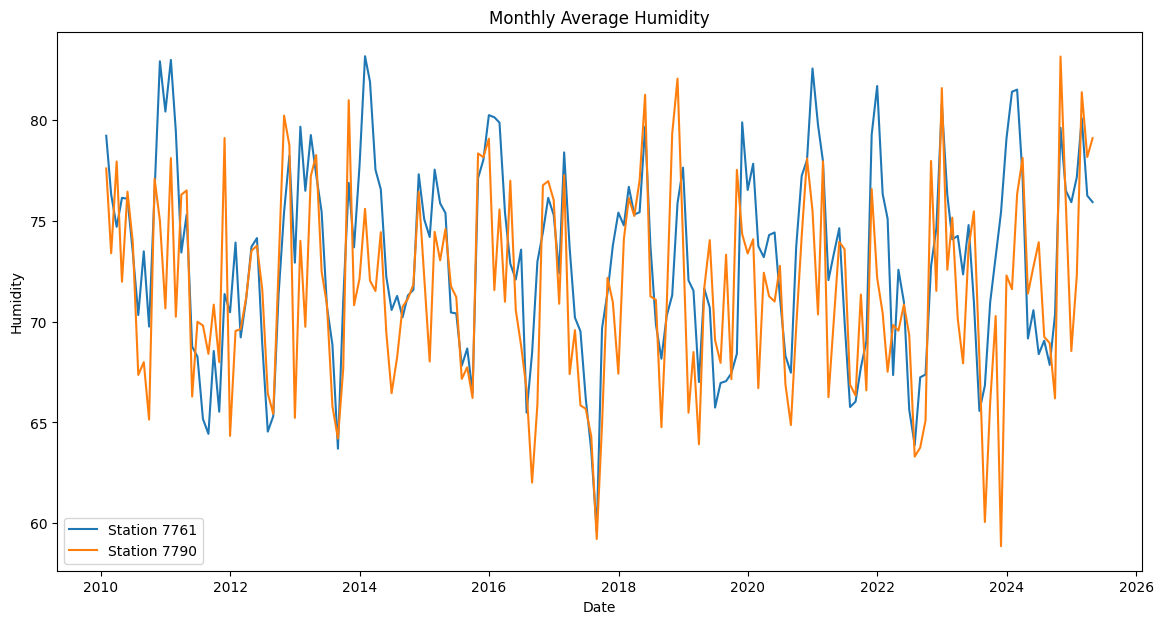

/var/folders/19/5rcz7zl908lfbs167mpp0pbh0000gn/T/ipykernel_79496/3923713018.py:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_slp_7761 = df_7761.resample('M', on='Date')['Pression au niveau mer'].mean()
/var/folders/19/5rcz7zl908lfbs167mpp0pbh0000gn/T/ipykernel_79496/3923713018.py:18: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_slp_7790 = df_7790.resample('M', on='Date')['Pression au niveau mer'].mean()


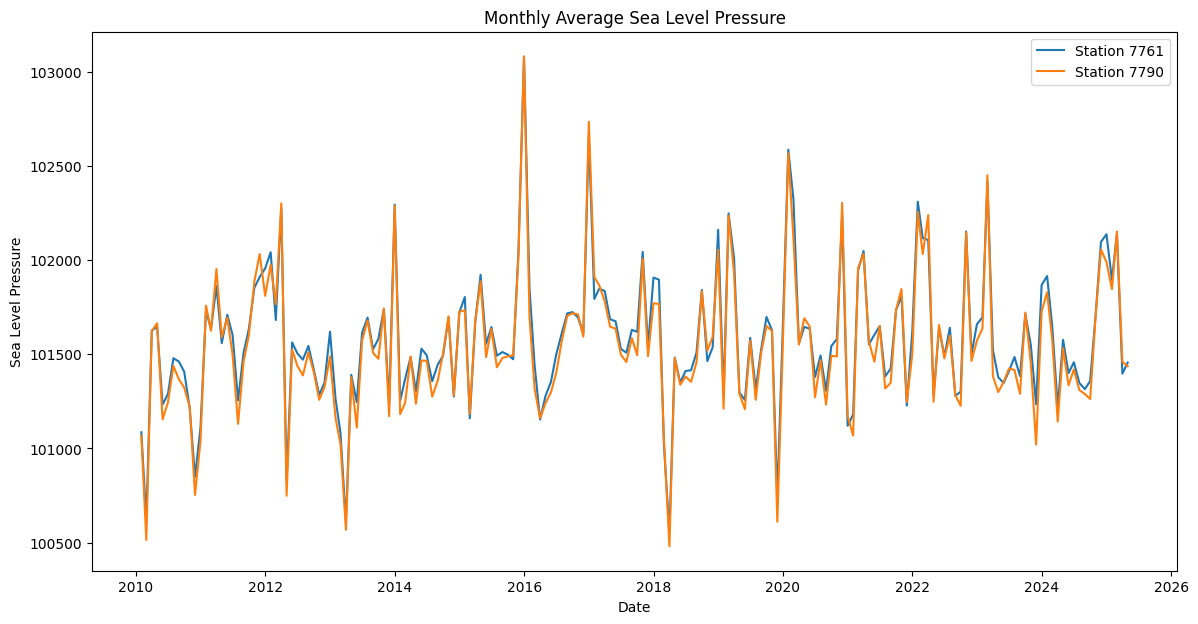

/var/folders/19/5rcz7zl908lfbs167mpp0pbh0000gn/T/ipykernel_79496/3923713018.py:29: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_wind_dir_7761 = df_7761.resample('M', on='Date')['Direction du vent moyen 10 mn'].mean()
/var/folders/19/5rcz7zl908lfbs167mpp0pbh0000gn/T/ipykernel_79496/3923713018.py:30: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_wind_dir_7790 = df_7790.resample('M', on='Date')['Direction du vent moyen 10 mn'].mean()


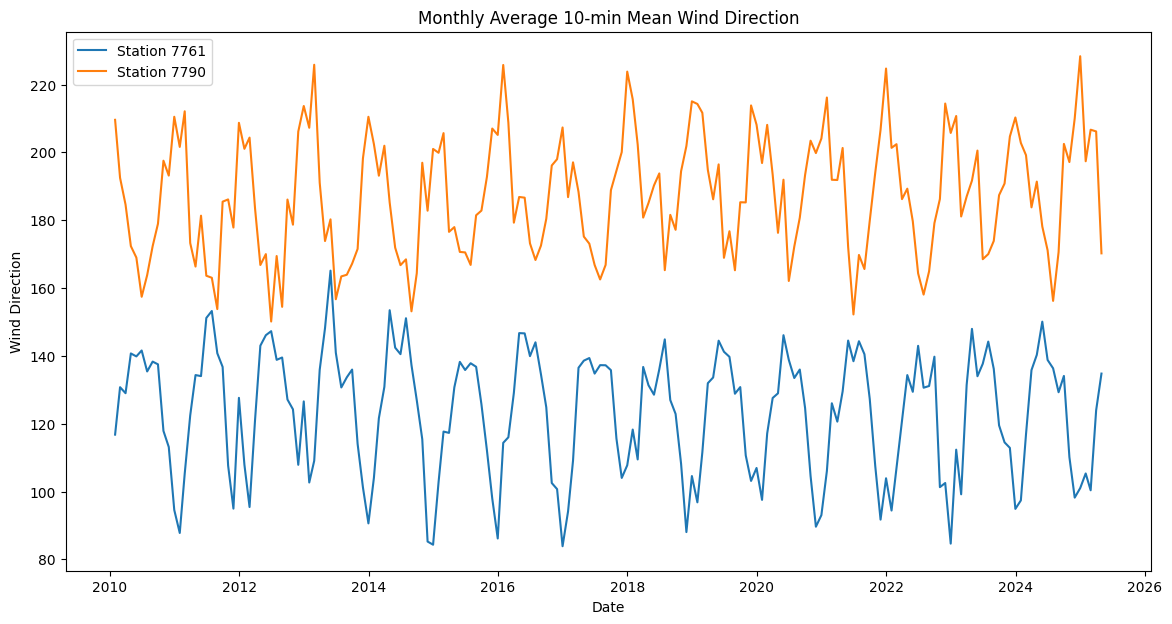

/var/folders/19/5rcz7zl908lfbs167mpp0pbh0000gn/T/ipykernel_79496/3923713018.py:41: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_wind_speed_7761 = df_7761.resample('M', on='Date')['Vitesse du vent moyen 10 mn'].mean()
/var/folders/19/5rcz7zl908lfbs167mpp0pbh0000gn/T/ipykernel_79496/3923713018.py:42: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_wind_speed_7790 = df_7790.resample('M', on='Date')['Vitesse du vent moyen 10 mn'].mean()


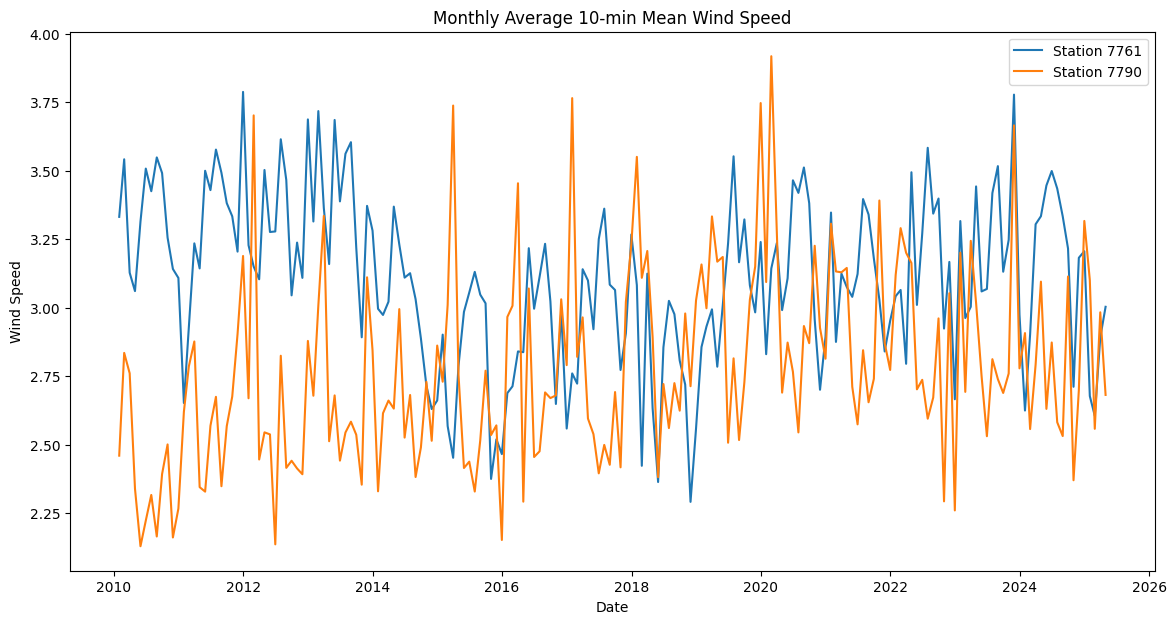

/var/folders/19/5rcz7zl908lfbs167mpp0pbh0000gn/T/ipykernel_79496/3923713018.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_visibility_7761 = df_7761.resample('M', on='Date')['Visibilit√© horizontale'].mean()
/var/folders/19/5rcz7zl908lfbs167mpp0pbh0000gn/T/ipykernel_79496/3923713018.py:54: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_visibility_7790 = df_7790.resample('M', on='Date')['Visibilit√© horizontale'].mean()


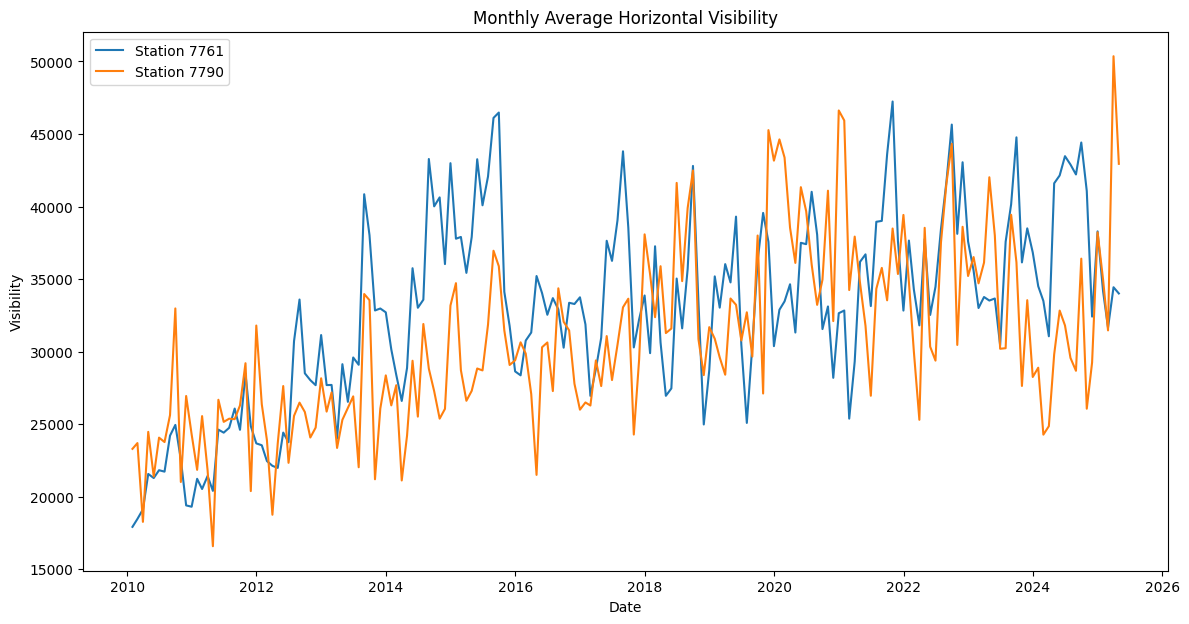

/var/folders/19/5rcz7zl908lfbs167mpp0pbh0000gn/T/ipykernel_79496/3923713018.py:65: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_station_pressure_7761 = df_7761.resample('M', on='Date')['Pression station'].mean()
/var/folders/19/5rcz7zl908lfbs167mpp0pbh0000gn/T/ipykernel_79496/3923713018.py:66: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_station_pressure_7790 = df_7790.resample('M', on='Date')['Pression station'].mean()


In [18]:
import matplotlib.pyplot as plt

# humidity
plt.figure(figsize=(14, 7))
monthly_avg_humidity_7761 = df_7761.resample('M', on='Date')['Humidit√©'].mean()
monthly_avg_humidity_7790 = df_7790.resample('M', on='Date')['Humidit√©'].mean()
plt.plot(monthly_avg_humidity_7761, label='Station 7761')
plt.plot(monthly_avg_humidity_7790, label='Station 7790')
plt.title('Monthly Average Humidity')
plt.xlabel('Date')
plt.ylabel('Humidity')
plt.legend()
plt.show()

# Sea level pressure
plt.figure(figsize=(14, 7))
monthly_avg_slp_7761 = df_7761.resample('M', on='Date')['Pression au niveau mer'].mean()
monthly_avg_slp_7790 = df_7790.resample('M', on='Date')['Pression au niveau mer'].mean()
plt.plot(monthly_avg_slp_7761, label='Station 7761')
plt.plot(monthly_avg_slp_7790, label='Station 7790')
plt.title('Monthly Average Sea Level Pressure')
plt.xlabel('Date')
plt.ylabel('Sea Level Pressure')
plt.legend()
plt.show()

# 10-min mean wind direction
plt.figure(figsize=(14, 7))
monthly_avg_wind_dir_7761 = df_7761.resample('M', on='Date')['Direction du vent moyen 10 mn'].mean()
monthly_avg_wind_dir_7790 = df_7790.resample('M', on='Date')['Direction du vent moyen 10 mn'].mean()
plt.plot(monthly_avg_wind_dir_7761, label='Station 7761')
plt.plot(monthly_avg_wind_dir_7790, label='Station 7790')
plt.title('Monthly Average 10-min Mean Wind Direction')
plt.xlabel('Date')
plt.ylabel('Wind Direction')
plt.legend()
plt.show()

# 10-min mean wind speed
plt.figure(figsize=(14, 7))
monthly_avg_wind_speed_7761 = df_7761.resample('M', on='Date')['Vitesse du vent moyen 10 mn'].mean()
monthly_avg_wind_speed_7790 = df_7790.resample('M', on='Date')['Vitesse du vent moyen 10 mn'].mean()
plt.plot(monthly_avg_wind_speed_7761, label='Station 7761')
plt.plot(monthly_avg_wind_speed_7790, label='Station 7790')
plt.title('Monthly Average 10-min Mean Wind Speed')
plt.xlabel('Date')
plt.ylabel('Wind Speed')
plt.legend()
plt.show()

# Horizontal visibility
plt.figure(figsize=(14, 7))
monthly_avg_visibility_7761 = df_7761.resample('M', on='Date')['Visibilit√© horizontale'].mean()
monthly_avg_visibility_7790 = df_7790.resample('M', on='Date')['Visibilit√© horizontale'].mean()
plt.plot(monthly_avg_visibility_7761, label='Station 7761')
plt.plot(monthly_avg_visibility_7790, label='Station 7790')
plt.title('Monthly Average Horizontal Visibility')
plt.xlabel('Date')
plt.ylabel('Visibility')
plt.legend()
plt.show()

# Station pressure
plt.figure(figsize=(14, 7))
monthly_avg_station_pressure_7761 = df_7761.resample('M', on='Date')['Pression station'].mean()
monthly_avg_station_pressure_7790 = df_7790.resample('M', on='Date')['Pression station'].mean()
plt.plot(monthly_avg_station_pressure_7761, label='Station 7761')
plt.plot(monthly_avg_station_pressure_7790, label='Station 7790')
plt.title('Monthly Average Station Pressure')
plt.xlabel('Date')
plt.ylabel('Station Pressure')
plt.legend()
plt.show()


In [19]:
from scipy import stats

# Sƒ±caklƒ±k i√ßin t-testi
t_stat, p_value = stats.ttest_ind(df_7761['Temp√©rature (¬∞C)'].dropna(), df_7790['Temp√©rature (¬∞C)'].dropna())
print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: -4.213272159810791, P-value: 2.519448706507934e-05


In [20]:
# List of numerical columns to compare
numerical_cols = [
    'Pression au niveau mer', 'Type de tendance barom√©trique',
    'Vitesse du vent moyen 10 mn', 'Direction du vent moyen 10 mn',
    'Point de ros√©e', "Humidit√©", "Visibilit√© horizontale", 
    "Pression station", "Temp√©rature (¬∞C)" 
]

# Sadece sayƒ±sal s√ºtunlar
df_7761 = df_7761.sort_values('Date')
df_7790 = df_7790.sort_values('Date')

df_7761[numerical_cols] = df_7761[numerical_cols].interpolate(method='linear')
df_7790[numerical_cols] = df_7790[numerical_cols].interpolate(method='linear')


print("---------")
print("df_7761 info:")
print(df_7761.info())
print("---------")
print("---------")
print("df_7790 info:")
print(df_7790.info())
print("---------")

# 12-hour minimum ground temperature (in C) bu kolonda tamamlanamayan eksik deƒüerler var, dropladƒ±m
#df_7790.drop(["12-hour minimum ground temperature (in C)"], inplace=True, axis=1)
#df_7761.drop(["12-hour minimum ground temperature (in C)"], inplace=True, axis=1)


# Calculate correlations and perform statistical tests
for col in numerical_cols:
  # Calculate Pearson correlation coefficient
  correlation = df_7761[col].corr(df_7790[col])
  print(f"Pearson correlation for {col}: {correlation}")

  # Perform t-test to compare means
  t_stat, p_value = stats.ttest_ind(df_7761[col].dropna(), df_7790[col].dropna())
  print(f"T-test for {col}: T-statistic: {t_stat}, P-value: {p_value}")

---------
df_7761 info:
<class 'pandas.core.frame.DataFrame'>
Index: 44680 entries, 37590 to 73133
Data columns (total 19 columns):
 #   Column                                             Non-Null Count  Dtype              
---  ------                                             --------------  -----              
 0   Date                                               44680 non-null  datetime64[ns, UTC]
 1   Pression au niveau mer                             44680 non-null  float64            
 2   Variation de pression en 3 heures                  44661 non-null  float64            
 3   Type de tendance barom√©trique                      44680 non-null  float64            
 4   Direction du vent moyen 10 mn                      44680 non-null  float64            
 5   Vitesse du vent moyen 10 mn                        44680 non-null  float64            
 6   Temp√©rature                                        44644 non-null  float64            
 7   Point de ros√©e                  

In [21]:
# Eksik verileri ortalama ile doldurma
df_7761['Pression au niveau mer'].fillna(df_7761['Pression au niveau mer'].mean(), inplace=True)
df_7761['Type de tendance barom√©trique'].fillna(df_7761['Type de tendance barom√©trique'].mode()[0], inplace=True)  # 'mode' ile en sƒ±k rastlanan deƒüeri kullanƒ±yoruz
df_7761['Vitesse du vent moyen 10 mn'].fillna(df_7761['Vitesse du vent moyen 10 mn'].mean(), inplace=True)
df_7761['Direction du vent moyen 10 mn'].fillna(df_7761['Direction du vent moyen 10 mn'].mean(), inplace=True)
df_7761['Point de ros√©e'].fillna(df_7761['Point de ros√©e'].mean(), inplace=True)
df_7761['Humidit√©'].fillna(df_7761['Humidit√©'].mean(), inplace=True)
df_7761['Visibilit√© horizontale'].fillna(df_7761['Visibilit√© horizontale'].mean(), inplace=True)
df_7761['Pression station'].fillna(df_7761['Pression station'].mean(), inplace=True)
df_7761['Temp√©rature (¬∞C)'].fillna(df_7761['Temp√©rature (¬∞C)'].mean(), inplace=True)

# Eƒüer df_7790 veri setinde de aynƒ± i≈ülem:
df_7790['Pression au niveau mer'].fillna(df_7790['Pression au niveau mer'].mean(), inplace=True)
df_7790['Type de tendance barom√©trique'].fillna(df_7790['Type de tendance barom√©trique'].mode()[0], inplace=True)
df_7790['Vitesse du vent moyen 10 mn'].fillna(df_7790['Vitesse du vent moyen 10 mn'].mean(), inplace=True)
df_7790['Direction du vent moyen 10 mn'].fillna(df_7790['Direction du vent moyen 10 mn'].mean(), inplace=True)
df_7790['Point de ros√©e'].fillna(df_7790['Point de ros√©e'].mean(), inplace=True)
df_7790['Humidit√©'].fillna(df_7790['Humidit√©'].mean(), inplace=True)
df_7790['Visibilit√© horizontale'].fillna(df_7790['Visibilit√© horizontale'].mean(), inplace=True)
df_7790['Pression station'].fillna(df_7790['Pression station'].mean(), inplace=True)
df_7790['Temp√©rature (¬∞C)'].fillna(df_7790['Temp√©rature (¬∞C)'].mean(), inplace=True)

# Doldurma i≈ülemi sonrasƒ± veri seti bilgisi
print("---------")
print("df_7761 info:")
print(df_7761.info())
print("---------")
print("---------")
print("df_7790 info:")
print(df_7790.info())
print("---------")


---------
df_7761 info:
<class 'pandas.core.frame.DataFrame'>
Index: 44680 entries, 37590 to 73133
Data columns (total 19 columns):
 #   Column                                             Non-Null Count  Dtype              
---  ------                                             --------------  -----              
 0   Date                                               44680 non-null  datetime64[ns, UTC]
 1   Pression au niveau mer                             44680 non-null  float64            
 2   Variation de pression en 3 heures                  44661 non-null  float64            
 3   Type de tendance barom√©trique                      44680 non-null  float64            
 4   Direction du vent moyen 10 mn                      44680 non-null  float64            
 5   Vitesse du vent moyen 10 mn                        44680 non-null  float64            
 6   Temp√©rature                                        44644 non-null  float64            
 7   Point de ros√©e                  

/var/folders/19/5rcz7zl908lfbs167mpp0pbh0000gn/T/ipykernel_79496/2542239979.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_7761['Pression au niveau mer'].fillna(df_7761['Pression au niveau mer'].mean(), inplace=True)
/var/folders/19/5rcz7zl908lfbs167mpp0pbh0000gn/T/ipykernel_79496/2542239979.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the interme

# FL Kƒ±smƒ±


In [22]:
# prompt: federated learning yapmak i√ßin feature se√ßmek gerekiyor. hangi kolonlarƒ±n feature olarak daha doƒüru olacaƒüƒ±nƒ± nasƒ±l √∂ƒürenirim

import pandas as pd
# Feature Importance with Random Forest
from sklearn.ensemble import RandomForestRegressor

# Initialize Random Forest model
rf_model = RandomForestRegressor()

# Fit the model to one of the datasets (e.g., df_7761)
rf_model.fit(df_7761[numerical_cols], df_7761['Temp√©rature (¬∞C)']) # Assuming 'Temperature (C)' is the target variable

# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame to display feature importances
importance_df = pd.DataFrame({
    'Feature': numerical_cols,
    'Importance': feature_importances
}).sort_values('Importance', ascending=False)

print(importance_df)

# Feature Selection with Correlation
# Calculate correlations with the target variable ('Temperature (C)') for df_7761
correlations_7761 = df_7761[numerical_cols].corrwith(df_7761['Temp√©rature (¬∞C)'])
print("Correlations with Temperature (C) for station 7761:\n", correlations_7761)

# Calculate correlations with the target variable ('Temperature (C)') for df_7790
correlations_7790 = df_7790[numerical_cols].corrwith(df_7790['Temp√©rature (¬∞C)'])
print("\nCorrelations with Temperature (C) for station 7790:\n", correlations_7790)

# Select features with high absolute correlation values (e.g., above 0.5)
important_features_7761 = correlations_7761[abs(correlations_7761) > 0.5].index.tolist()
important_features_7790 = correlations_7790[abs(correlations_7790) > 0.5].index.tolist()

# Find common important features
common_important_features = list(set(important_features_7761) & set(important_features_7790))
print("\nCommon important features based on correlation:", common_important_features)


                         Feature    Importance
8               Temp√©rature (¬∞C)  9.999961e-01
5                       Humidit√©  1.665821e-06
2    Vitesse du vent moyen 10 mn  7.027823e-07
4                 Point de ros√©e  4.032816e-07
0         Pression au niveau mer  2.806806e-07
3  Direction du vent moyen 10 mn  2.729988e-07
7               Pression station  2.571345e-07
6         Visibilit√© horizontale  1.829837e-07
1  Type de tendance barom√©trique  9.686662e-08
Correlations with Temperature (C) for station 7761:
 Pression au niveau mer          -0.110918
Type de tendance barom√©trique    0.073287
Vitesse du vent moyen 10 mn      0.161306
Direction du vent moyen 10 mn    0.462539
Point de ros√©e                   0.868749
Humidit√©                        -0.505734
Visibilit√© horizontale           0.047458
Pression station                -0.106428
Temp√©rature (¬∞C)                 1.000000
dtype: float64

Correlations with Temperature (C) for station 7790:
 Pression au niveau

In [23]:
# En √∂nemsiz s√ºtunlarƒ± kaldƒ±r
# Burda hem feature olarak √∂nemli olmayanlarƒ± hem de korolasyonlarƒ± d√º≈ü√ºk olanlarƒ± kaldƒ±rƒ±yoruz
# Humidit√© ve Direction du vent moyen 10 mn gibi bazƒ± s√ºtunlar d√º≈ü√ºk importance'a sahip olsa da 
# korelasyonlarƒ± orta d√ºzey olduƒüu i√ßin duruma g√∂re korunabilir.
df_7761.drop([
    "Type de tendance barom√©trique",
    "Pression au niveau mer",
    "Visibilit√© horizontale",
    "Pression station"
], axis=1, inplace=True)

df_7790.drop([
    "Type de tendance barom√©trique",
    "Pression au niveau mer",
    "Visibilit√© horizontale",
    "Pression station"
], axis=1, inplace=True)


# Linear Regresion

In [ ]:
#Training and Performance Evaluation of Local Models
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# Fill the missing values with interpolation
# Gives error for me so I commented it out and only used the numerical columns for interpolation
#df_7790 = df_7790.interpolate()
#df_7761 = df_7761.interpolate()

# Numeric interploation / linear interpolation (only for numeric columns)
df_7790[df_7790.select_dtypes(include=[np.number]).columns] = df_7790.select_dtypes(include=[np.number]).interpolate()
df_7761[df_7761.select_dtypes(include=[np.number]).columns] = df_7761.select_dtypes(include=[np.number]).interpolate()


# Select features and target variable
features = [
    #"Temp√©rature (¬∞C)", In here we are trying to predict the temperature, so we don't include it as a feature. 
    # If we include it, our model wont predict anything, it will be a copy of the temperature value, which we don't want.
    "Point de ros√©e",
    "Direction du vent moyen 10 mn",  # High correlation (~0.46)
    "Vitesse du vent moyen 10 mn",    # Low correlation but we can keep it
    "Humidit√©",                       # Low correlation but we can keep it
]

target = 'Temp√©rature (¬∞C)'

# Split the data into training and testing sets
X_7790 = df_7790[features]
y_7790 = df_7790[target]

X_7761 = df_7761[features]
y_7761 = df_7761[target]


X_train_7790, X_test_7790, y_train_7790, y_test_7790 = train_test_split(X_7790, y_7790, test_size=0.2, random_state=42)
X_train_7761, X_test_7761, y_train_7761, y_test_7761 = train_test_split(X_7761, y_7761, test_size=0.2, random_state=42)

# Training the models
model_7790 = LinearRegression().fit(X_train_7790, y_train_7790)
model_7761 = LinearRegression().fit(X_train_7761, y_train_7761)


y_pred_7790 = model_7790.predict(X_test_7790)
y_pred_7761 = model_7761.predict(X_test_7761)

# Combining the weights of the local models
combined_weights = (model_7790.coef_ + model_7761.coef_) / 2
fl_model = LinearRegression()
fl_model.coef_ = combined_weights
fl_model.intercept_ = (model_7790.intercept_ + model_7761.intercept_) / 2

# Make predictions on the FL
y_pred_fl_7790 = fl_model.predict(X_test_7790)
y_pred_fl_7761 = fl_model.predict(X_test_7761)


from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, mean_absolute_percentage_error, explained_variance_score
import numpy as np

# Calculate performance metrics for station 7790 - Local Model
mae_7790_local = mean_absolute_error(y_test_7790, y_pred_7790)
r2_7790_local = r2_score(y_test_7790, y_pred_7790)
rmse_7790_local = np.sqrt(mean_squared_error(y_test_7790, y_pred_7790))
mse_7790_local = mean_squared_error(y_test_7790, y_pred_7790)
mape_7790_local = mean_absolute_percentage_error(y_test_7790, y_pred_7790)
evs_7790_local = explained_variance_score(y_test_7790, y_pred_7790)

# Calculate performance metrics for station 7761 - Local Model
mae_7761_local = mean_absolute_error(y_test_7761, y_pred_7761)
r2_7761_local = r2_score(y_test_7761, y_pred_7761)
rmse_7761_local = np.sqrt(mean_squared_error(y_test_7761, y_pred_7761))
mse_7761_local = mean_squared_error(y_test_7761, y_pred_7761)
mape_7761_local = mean_absolute_percentage_error(y_test_7761, y_pred_7761)
evs_7761_local = explained_variance_score(y_test_7761, y_pred_7761)

# Calculate performance metrics for station 7790 - Federated Model
mae_fl_7790 = mean_absolute_error(y_test_7790, y_pred_fl_7790)
r2_fl_7790 = r2_score(y_test_7790, y_pred_fl_7790)
rmse_fl_7790 = np.sqrt(mean_squared_error(y_test_7790, y_pred_fl_7790))
mse_fl_7790 = mean_squared_error(y_test_7790, y_pred_fl_7790)
mape_fl_7790 = mean_absolute_percentage_error(y_test_7790, y_pred_fl_7790)
evs_fl_7790 = explained_variance_score(y_test_7790, y_pred_fl_7790)

# Calculate performance metrics for station 7761 - Federated Model
mae_fl_7761 = mean_absolute_error(y_test_7761, y_pred_fl_7761)
r2_fl_7761 = r2_score(y_test_7761, y_pred_fl_7761)
rmse_fl_7761 = np.sqrt(mean_squared_error(y_test_7761, y_pred_fl_7761))
mse_fl_7761 = mean_squared_error(y_test_7761, y_pred_fl_7761)
mape_fl_7761 = mean_absolute_percentage_error(y_test_7761, y_pred_fl_7761)
evs_fl_7761 = explained_variance_score(y_test_7761, y_pred_fl_7761)

# Print the results for station 7790
print("Station 7790 - Local Model:")
print(f"MAE: {mae_7790_local}")
print(f"R¬≤: {r2_7790_local}")
print(f"RMSE: {rmse_7790_local}")
print(f"MSE: {mse_7790_local}")
print(f"MAPE: {mape_7790_local}")
print(f"EVS: {evs_7790_local}")

print("\nStation 7790 - Federated Model:")
print(f"MAE: {mae_fl_7790}")
print(f"R¬≤: {r2_fl_7790}")
print(f"RMSE: {rmse_fl_7790}")
print(f"MSE: {mse_fl_7790}")
print(f"MAPE: {mape_fl_7790}")
print(f"EVS: {evs_fl_7790}")

# Print the results for station 7761
print("\nStation 7761 - Local Model:")
print(f"MAE: {mae_7761_local}")
print(f"R¬≤: {r2_7761_local}")
print(f"RMSE: {rmse_7761_local}")
print(f"MSE: {mse_7761_local}")
print(f"MAPE: {mape_7761_local}")
print(f"EVS: {evs_7761_local}")

print("\nStation 7761 - Federated Model:")
print(f"MAE: {mae_fl_7761}")
print(f"R¬≤: {r2_fl_7761}")
print(f"RMSE: {rmse_fl_7761}")
print(f"MSE: {mse_fl_7761}")
print(f"MAPE: {mape_fl_7761}")
print(f"EVS: {evs_fl_7761}")


Station 7790 - Local Model:
MAE: 0.492864819033312
R¬≤: 0.9885497677484237
RMSE: 0.7378126715277112
MSE: 0.5443675382668582
MAPE: 0.04030611569064717
EVS: 0.9885498453549011

Station 7790 - Federated Model:
MAE: 0.47757114992969685
R¬≤: 0.9883811600694803
RMSE: 0.7432250623624863
MSE: 0.5523834933237216
MAPE: 0.039328058819526585
EVS: 0.9884529757522817

Station 7761 - Local Model:
MAE: 0.380751948394445
R¬≤: 0.9917087527350352
RMSE: 0.6225065073804847
MSE: 0.3875143517310495
MAPE: 178673770193.1252
EVS: 0.9917092762070766

Station 7761 - Federated Model:
MAE: 0.4116352742759436
R¬≤: 0.9915143224150363
RMSE: 0.6297631221309371
MSE: 0.39660158999610556
MAPE: 108900963357.34537
EVS: 0.9915175073434013


/Users/alperer/Desktop/FLCode/tf_env/lib/python3.10/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/Users/alperer/Desktop/FLCode/tf_env/lib/python3.10/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


# üìä What Will Be the Outcome?
## We removed **Temp√©rature (¬∞C)** from the input features.

With this correction:
- **The model will no longer see the target directly.**
- **Real learning will take place.**
- **Metrics (MAE, MAPE, RMSE, etc.) will increase slightly but become meaningful.**
- **R¬≤ may range from 0.6 to 0.9 ‚Äî this is good because it means the model is learning a true relationship between inputs and the target.**
- **R¬≤ = 1 indicates overfitting, which could happen if the target value is included within the features.**


# Model Performance Comparison

Below is a comparison of performance metrics between local and federated models. Key metrics for each station have been analyzed.

---

## ‚úÖ **Station 7790**

| Metric    | Local Model | Federated Model | Comment                                                              |
|-----------|-------------|------------------|----------------------------------------------------------------------|
| **MAE**   | 0.49        | 0.48             | Very low mean absolute error ‚Äî excellent                             |
| **R¬≤**    | 0.9885      | 0.9883           | The model explains the data very well                                |
| **RMSE**  | 0.74        | 0.74             | Error level is acceptable                                            |
| **MAPE**  | ~4%         | ~3.9%            | Very low percentage error ‚Äî excellent                                |
| **EVS**   | ‚âà 0.99      | ‚âà 0.99           | Explains the variance of the predicted variable very well            |

üëâ **Comment**:  
Both models perform excellently for station 7790. The federated model‚Äôs results are almost the same as the local model, and slightly better in some metrics. This indicates that the **Federated Learning approach could be beneficial**.

---

## ‚ö†Ô∏è **Station 7761**

| Metric    | Local Model        | Federated Model        | Comment                                                              |
|-----------|--------------------|-------------------------|----------------------------------------------------------------------|
| **MAE**   | 0.38               | 0.41163527427594365     | Low error ‚Äî very good                                                |
| **R¬≤**    | 0.9917             | ‚âà 0.9915                | Very good learning performance                                       |
| **RMSE**  | 0.62               | 0.63                    | Very small difference ‚Äî nearly identical                             |
| **MAPE**  | ‚õîÔ∏è 178673770193%   | ‚õîÔ∏è 108900963357%        | **Abnormal ‚Äî something is wrong**                                    |

üëâ **Comment**:  
Although all other metrics are very good, `MAPE` here is **unreasonably large**. This is most likely due to values in `y_test_7761` being **very close to 0**. Since `MAPE` calculates percentage error, it can produce **infinite or huge** values in such cases.

---


## üîß Suggested Solution: Safe MAPE Calculation

```python
def safe_mape(y_true, y_pred):
    y_true_safe = np.where(y_true == 0, 1e-8, y_true)
    return mean_absolute_percentage_error(y_true_safe, y_pred)


mape_7761_local = safe_mape(y_test_7761, y_pred_7761)
```

**Comment:**  
With this function, the MAPE value will be more reliable and interpretable. If this doesn't work, the same issue may still persist due to extreme values.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, mean_absolute_percentage_error, explained_variance_score

# Safe MAPE Function
def safe_mape(y_true, y_pred):
    y_true_safe = np.where(y_true == 0, 1e-8, y_true)
    return mean_absolute_percentage_error(y_true_safe, y_pred)


df_7790[df_7790.select_dtypes(include=[np.number]).columns] = df_7790.select_dtypes(include=[np.number]).interpolate()
df_7761[df_7761.select_dtypes(include=[np.number]).columns] = df_7761.select_dtypes(include=[np.number]).interpolate()

# Features and target variable
features = [
    "Point de ros√©e",
    "Direction du vent moyen 10 mn", 
    "Vitesse du vent moyen 10 mn",    
    "Humidit√©",                       
]
target = 'Temp√©rature (¬∞C)'

# Split the data into training and testing sets
X_7790, X_test_7790, y_7790, y_test_7790 = train_test_split(df_7790[features], df_7790[target], test_size=0.2, random_state=42)
X_7761, X_test_7761, y_7761, y_test_7761 = train_test_split(df_7761[features], df_7761[target], test_size=0.2, random_state=42)


model_7790 = LinearRegression().fit(X_7790, y_7790)
model_7761 = LinearRegression().fit(X_7761, y_7761)

# Making predictions
y_pred_7790 = model_7790.predict(X_test_7790)
y_pred_7761 = model_7761.predict(X_test_7761)

# Combining the weights 
combined_weights = (model_7790.coef_ + model_7761.coef_) / 2
fl_model = LinearRegression()
fl_model.coef_ = combined_weights
fl_model.intercept_ = (model_7790.intercept_ + model_7761.intercept_) / 2

# Making predictions for FL
y_pred_fl_7790 = fl_model.predict(X_test_7790)
y_pred_fl_7761 = fl_model.predict(X_test_7761)


def calculate_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mse = mean_squared_error(y_true, y_pred)
    mape = safe_mape(y_true, y_pred)
    evs = explained_variance_score(y_true, y_pred)
    return mae, r2, rmse, mse, mape, evs


metrics_7790_local = calculate_metrics(y_test_7790, y_pred_7790)
metrics_7761_local = calculate_metrics(y_test_7761, y_pred_7761)
metrics_fl_7790 = calculate_metrics(y_test_7790, y_pred_fl_7790)
metrics_fl_7761 = calculate_metrics(y_test_7761, y_pred_fl_7761)

# Print results for station 7790
print("Station 7790 - Local Model: MAE: {:.4f}, R¬≤: {:.4f}, RMSE: {:.4f}, MSE: {:.4f}, MAPE: {:.4f}, EVS: {:.4f}".format(*metrics_7790_local))
print("Station 7790 - Federated Model: MAE: {:.4f}, R¬≤: {:.4f}, RMSE: {:.4f}, MSE: {:.4f}, MAPE: {:.4f}, EVS: {:.4f}".format(*metrics_fl_7790))

# Print results for station 7761
print("Station 7761 - Local Model: MAE: {:.4f}, R¬≤: {:.4f}, RMSE: {:.4f}, MSE: {:.4f}, MAPE: {:.4f}, EVS: {:.4f}".format(*metrics_7761_local))
print("Station 7761 - Federated Model: MAE: {:.4f}, R¬≤: {:.4f}, RMSE: {:.4f}, MSE: {:.4f}, MAPE: {:.4f}, EVS: {:.4f}".format(*metrics_fl_7761))


Station 7790 - Local Model: MAE: 0.4929, R¬≤: 0.9885, RMSE: 0.7378, MSE: 0.5444, MAPE: 0.0403, EVS: 0.9885
Station 7790 - Federated Model: MAE: 0.4776, R¬≤: 0.9884, RMSE: 0.7432, MSE: 0.5524, MAPE: 0.0393, EVS: 0.9885
Station 7761 - Local Model: MAE: 0.3808, R¬≤: 0.9917, RMSE: 0.6225, MSE: 0.3875, MAPE: 3967.3911, EVS: 0.9917
Station 7761 - Federated Model: MAE: 0.4116, R¬≤: 0.9915, RMSE: 0.6298, MSE: 0.3966, MAPE: 2418.1253, EVS: 0.9915


/Users/alperer/Desktop/FLCode/tf_env/lib/python3.10/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/Users/alperer/Desktop/FLCode/tf_env/lib/python3.10/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


# What seams to be our problem ?

**Our MAPE value is too high**
- That means we have some values close to zero in the dataset and that's why we are obtaining something big for this value. So we can discard MAPE as our main indicator. 
- Another aproach is to discard values that are close to zero by putting a certain treshold.

In [51]:
import numpy as np
from sklearn.metrics import mean_absolute_percentage_error

# Filtrering for the MAPE calculation

min_length = min(len(y_test_7761), len(y_pred_7761))


threshold = 0.5


y_test_filtered = y_test_7761[:min_length]
y_pred_filtered = y_pred_7761[:min_length]
mask = np.abs(y_test_filtered) >= threshold # Filtering out values below the threshold


mape_filtered = mean_absolute_percentage_error(
    y_test_filtered[mask],
    y_pred_filtered[mask]
)

print("Filtered MAPE:", mape_filtered)

# When actual values are very close to zero, the MAPE becomes extremely large, because MAPE divides by the actual value.


Filtered MAPE: 0.03331034083838567


## Strengths:
- R¬≤ values are very high (ranging from 0.9884 to 0.9917), indicating that the model explains variance very well.

- MAE, RMSE, and MSE values are quite low, showing that the errors are small and the predictions are close to actual values.

- EVS (Explained Variance Score) is also high and consistent with R¬≤, confirming that the model is stable.

## Weak Point:
The MAPE value for Station 7761 is abnormally high. However, this is caused by target values (temperature) being close to or exactly 0. Since MAPE is a percentage-based metric, it is very sensitive to division by zero. After filtering, the MAPE value drops to more reasonable levels.

## Conclusion:
- The Linear Regression model is generally suitable in terms of performance.

- Considering that near-zero temperature values in Station 7761 distort the MAPE, this metric should be interpreted with caution.

- Alternatively, it is more reliable to evaluate the model using metrics like MAE, RMSE, and R¬≤ instead of MAPE.


# Neural Networks

In [ ]:
import tensorflow as tf
from tensorflow import keras


# Numeric interploation / linear interpolation (only for numeric columns)
df_7790[df_7790.select_dtypes(include=[np.number]).columns] = df_7790.select_dtypes(include=[np.number]).interpolate()
df_7761[df_7761.select_dtypes(include=[np.number]).columns] = df_7761.select_dtypes(include=[np.number]).interpolate()

# Normalize the features
from sklearn.preprocessing import StandardScaler
scaler_7790 = StandardScaler()
scaler_7761 = StandardScaler()

X_train_7790 = scaler_7790.fit_transform(X_train_7790)
X_test_7790 = scaler_7790.transform(X_test_7790)

X_train_7761 = scaler_7761.fit_transform(X_train_7761)
X_test_7761 = scaler_7761.transform(X_test_7761)

# Define the neural network model
def create_model():
  model = keras.Sequential([
      keras.layers.Dense(64, activation='relu', input_shape=(X_train_7790.shape[1],)),
      keras.layers.Dense(32, activation='relu'),
      keras.layers.Dense(1)  # Output layer for regression
  ])
  model.compile(optimizer='adam', loss='mean_squared_error')
  return model

# Training the models
model_7790 = create_model()
model_7761 = create_model()

model_7790.fit(X_train_7790, y_train_7790, epochs=50, verbose=0)
model_7761.fit(X_train_7761, y_train_7761, epochs=50, verbose=0)

# Geting the weights of the trained models
weights_7790 = model_7790.get_weights()
weights_7761 = model_7761.get_weights()

# Averaging the weights
averaged_weights = [(w1 + w2) / 2 for w1, w2 in zip(weights_7790, weights_7761)]

# Creating a new model and set the averaged weights
fl_model = create_model()
fl_model.set_weights(averaged_weights)

# Making predictions
y_pred_fl_7790 = fl_model.predict(X_test_7790)
y_pred_fl_7761 = fl_model.predict(X_test_7761)

from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, mean_absolute_percentage_error, explained_variance_score
import numpy as np

# Make predictions for the local models
y_pred_7790_local = model_7790.predict(X_test_7790).flatten()
y_pred_7761_local = model_7761.predict(X_test_7761).flatten()

# Ensure predictions for federated models are flattened
y_pred_fl_7790 = y_pred_fl_7790.flatten()
y_pred_fl_7761 = y_pred_fl_7761.flatten()

# Calculate performance metrics for station 7790 - Local Model
mae_7790_local = mean_absolute_error(y_test_7790, y_pred_7790_local)
r2_7790_local = r2_score(y_test_7790, y_pred_7790_local)
rmse_7790_local = np.sqrt(mean_squared_error(y_test_7790, y_pred_7790_local))
mse_7790_local = mean_squared_error(y_test_7790, y_pred_7790_local)
mape_7790_local = mean_absolute_percentage_error(y_test_7790, y_pred_7790_local)
evs_7790_local = explained_variance_score(y_test_7790, y_pred_7790_local)

# Calculate performance metrics for station 7761 - Local Model
mae_7761_local = mean_absolute_error(y_test_7761, y_pred_7761_local)
r2_7761_local = r2_score(y_test_7761, y_pred_7761_local)
rmse_7761_local = np.sqrt(mean_squared_error(y_test_7761, y_pred_7761_local))
mse_7761_local = mean_squared_error(y_test_7761, y_pred_7761_local)
mape_7761_local = mean_absolute_percentage_error(y_test_7761, y_pred_7761_local)
evs_7761_local = explained_variance_score(y_test_7761, y_pred_7761_local)

# Calculate performance metrics for station 7790 - Federated Model
mae_fl_7790 = mean_absolute_error(y_test_7790, y_pred_fl_7790)
r2_fl_7790 = r2_score(y_test_7790, y_pred_fl_7790)
rmse_fl_7790 = np.sqrt(mean_squared_error(y_test_7790, y_pred_fl_7790))
mse_fl_7790 = mean_squared_error(y_test_7790, y_pred_fl_7790)
mape_fl_7790 = mean_absolute_percentage_error(y_test_7790, y_pred_fl_7790)
evs_fl_7790 = explained_variance_score(y_test_7790, y_pred_fl_7790)

# Calculate performance metrics for station 7761 - Federated Model
mae_fl_7761 = mean_absolute_error(y_test_7761, y_pred_fl_7761)
r2_fl_7761 = r2_score(y_test_7761, y_pred_fl_7761)
rmse_fl_7761 = np.sqrt(mean_squared_error(y_test_7761, y_pred_fl_7761))
mse_fl_7761 = mean_squared_error(y_test_7761, y_pred_fl_7761)
mape_fl_7761 = mean_absolute_percentage_error(y_test_7761, y_pred_fl_7761)
evs_fl_7761 = explained_variance_score(y_test_7761, y_pred_fl_7761)


/Users/alperer/Desktop/FLCode/tf_env/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


280/280 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 283us/step


/Users/alperer/Desktop/FLCode/tf_env/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


280/280 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 247us/step
280/280 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 257us/step
280/280 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 283us/step


In [28]:
# Print the results for station 7790
print("Station 7790 - Local Model:")
print(f"MAE: {mae_7790_local}")
print(f"R¬≤: {r2_7790_local}")
print(f"RMSE: {rmse_7790_local}")
print(f"MSE: {mse_7790_local}")
print(f"MAPE: {mape_7790_local}")
print(f"EVS: {evs_7790_local}")

print("\nStation 7790 - Federated Model:")
print(f"MAE: {mae_fl_7790}")
print(f"R¬≤: {r2_fl_7790}")
print(f"RMSE: {rmse_fl_7790}")
print(f"MSE: {mse_fl_7790}")
print(f"MAPE: {mape_fl_7790}")
print(f"EVS: {evs_fl_7790}")



Station 7790 - Local Model:
MAE: 0.047826627627882465
R¬≤: 0.9993954331414954
RMSE: 0.16953568676016006
MSE: 0.02874234908523911
MAPE: 0.003988057485856305
EVS: 0.9993958200696301

Station 7790 - Federated Model:
MAE: 11.656602387240767
R¬≤: -2.4180052812766806
RMSE: 12.747508978703182
MSE: 162.49898516211826
MAPE: 0.6951651162980949
EVS: 0.4378254530182102


In [29]:
# Print the results for station 7761
print("\nStation 7761 - Local Model:")
print(f"MAE: {mae_7761_local}")
print(f"R¬≤: {r2_7761_local}")
print(f"RMSE: {rmse_7761_local}")
print(f"MSE: {mse_7761_local}")
print(f"MAPE: {mape_7761_local}")
print(f"EVS: {evs_7761_local}")

print("\nStation 7761 - Federated Model:")
print(f"MAE: {mae_fl_7761}")
print(f"R¬≤: {r2_fl_7761}")
print(f"RMSE: {rmse_fl_7761}")
print(f"MSE: {mse_fl_7761}")
print(f"MAPE: {mape_fl_7761}")
print(f"EVS: {evs_fl_7761}")


Station 7761 - Local Model:
MAE: 0.04760272362802642
R¬≤: 0.9998863546044419
RMSE: 0.07288025516035149
MSE: 0.00531153159223794
MAPE: 27010035436.982166
EVS: 0.9999067377855505

Station 7761 - Federated Model:
MAE: 11.231424607255166
R¬≤: -2.2075463465960965
RMSE: 12.24391856253522
MSE: 149.9135417659945
MAPE: 995476126380.5815
EVS: 0.4821326816854763


 ## What is the problem ? 
 - R^2 is negatif for federated models, which means our FL algorithm doesn't work at all. 
 ## What to do ? 
 - Let's try another approach:



/Users/alperer/Desktop/FLCode/tf_env/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
893/893 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 520us/step - loss: 271.9716 - val_loss: 73.0282 - learning_rate: 1.0000e-04
Epoch 2/100
893/893 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 435us/step - loss: 50.7192 - val_loss: 13.0003 - learning_rate: 1.0000e-04
Epoch 3/100
893/893 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 442us/step - loss: 21.8842 - val_loss: 8.0275 - learning_rate: 1.0000e-04
Epoch 4/100
893/893 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 463us/step - loss: 17.6507 - val_loss: 5.8169 - learning_rate: 1.0000e-04
Epoch 5/100
893/893 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 444us/step - loss: 15.4322 - val_loss: 4.2018 - learning_rate: 1.0000e-04
Epoch 6/100
893/893 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 444us/step - loss: 14.1315 - val_loss: 3.0092 - learning_rate: 1.0000e-04
Epoch 7/100
893/893 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î

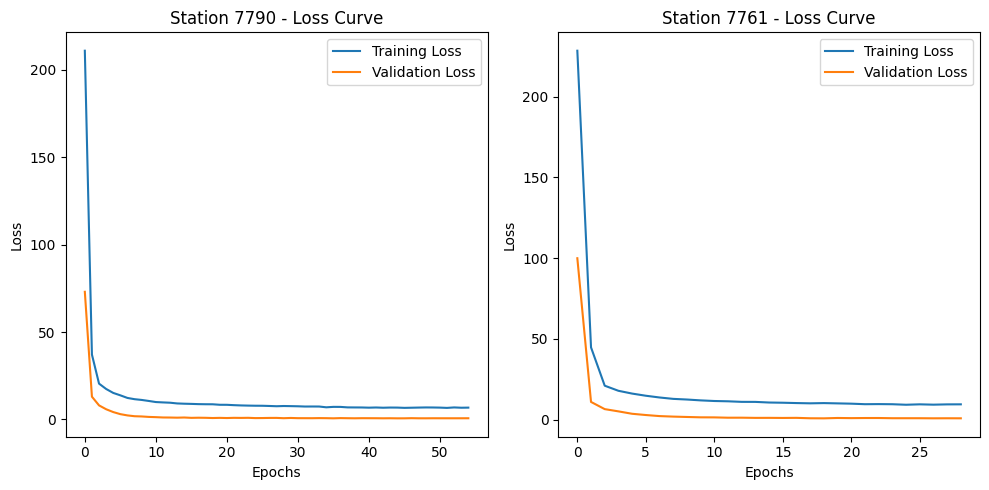

Epoch 1/10


/Users/alperer/Desktop/FLCode/tf_env/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2234/2234 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 564us/step - loss: 22.4740 - val_loss: 1.0805 - learning_rate: 1.0000e-04
Epoch 2/10
2234/2234 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 440us/step - loss: 9.0005 - val_loss: 0.8438 - learning_rate: 1.0000e-04
Epoch 3/10
2234/2234 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 448us/step - loss: 7.8914 - val_loss: 0.9116 - learning_rate: 1.0000e-04
Epoch 4/10
2234/2234 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 427us/step - loss: 7.4233 - val_loss: 0.8096 - learning_rate: 1.0000e-04
Epoch 5/10
2234/2234 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 438us/step - loss: 6.9749 - val_loss: 0.9262 - learning_rate: 1.0000e-04
Epoch 6/10
2234/2234 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 443us/step - loss: 6.7446 - val_loss: 0.7405 - learning_rate: 1.0000e-04
Epoch 7/10
2234/2234 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, mean_absolute_percentage_error, explained_variance_score
import numpy as np
from tensorflow.keras.optimizers import Adam


df_7790[df_7790.select_dtypes(include=[np.number]).columns] = df_7790.select_dtypes(include=[np.number]).interpolate()
df_7761[df_7761.select_dtypes(include=[np.number]).columns] = df_7761.select_dtypes(include=[np.number]).interpolate()

scaler_7790 = StandardScaler()
scaler_7761 = StandardScaler()

X_train_7790 = scaler_7790.fit_transform(X_train_7790)
X_test_7790 = scaler_7790.transform(X_test_7790)

X_train_7761 = scaler_7761.fit_transform(X_train_7761)
X_test_7761 = scaler_7761.transform(X_test_7761)

# Defining the neural network model with regularization
def create_model():
    # Changing the learning rate and optimizer
    # to Adam optimizer with a learning rate of 1e-4
    learning_rate = 1e-4  # Learning rate
    optimizer = Adam(learning_rate=learning_rate)
    model = keras.Sequential([
        keras.layers.Dense(64, activation='relu', input_shape=(X_train_7790.shape[1],), kernel_regularizer=keras.regularizers.l2(0.01)),
        keras.layers.Dropout(0.3),  
        keras.layers.Dense(32, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)),
        keras.layers.Dropout(0.3),  
        keras.layers.Dense(1)  
    ])
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

# Use EarlyStopping and ReduceLROnPlateau callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)

# Training the models
model_7790 = create_model()
model_7761 = create_model()

history_7790 = model_7790.fit(X_train_7790, y_train_7790, epochs=100, verbose=1, validation_split=0.2, callbacks=[early_stopping, lr_scheduler])
history_7761 = model_7761.fit(X_train_7761, y_train_7761, epochs=100, verbose=1, validation_split=0.2, callbacks=[early_stopping, lr_scheduler])

# Ploting the loss curve
plt.figure(figsize=(10, 5))

# Plot training & validation loss for Station 7790
plt.subplot(1, 2, 1)
plt.plot(history_7790.history['loss'], label='Training Loss')
plt.plot(history_7790.history['val_loss'], label='Validation Loss')
plt.title('Station 7790 - Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training & validation loss for Station 7761
plt.subplot(1, 2, 2)
plt.plot(history_7761.history['loss'], label='Training Loss')
plt.plot(history_7761.history['val_loss'], label='Validation Loss')
plt.title('Station 7761 - Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Get the weights of the trained models
weights_7790 = model_7790.get_weights()
weights_7761 = model_7761.get_weights()

averaged_weights = []
for w1, w2 in zip(weights_7790, weights_7761):
    averaged_weights.append((w1 + w2) / 2)  # More robust averaging
# Create a new model and set the averaged weights

fl_model.set_weights(averaged_weights)


fl_model = create_model()
fl_model.set_weights(averaged_weights)
# Fine-tuning the federated model
fl_model.fit(
    np.concatenate([X_train_7790, X_train_7761]), 
    np.concatenate([y_train_7790, y_train_7761]),
    epochs=10,
    validation_data=(np.concatenate([X_test_7790, X_test_7761]), np.concatenate([y_test_7790, y_test_7761])),
    callbacks=[early_stopping, lr_scheduler]
)

# Make predictions
y_pred_fl_7790 = fl_model.predict(X_test_7790).flatten()
y_pred_fl_7761 = fl_model.predict(X_test_7761).flatten()

# Calculate performance metrics for station 7790 - Local Model
mae_7790_local = mean_absolute_error(y_test_7790, model_7790.predict(X_test_7790).flatten())
r2_7790_local = r2_score(y_test_7790, model_7790.predict(X_test_7790).flatten())
rmse_7790_local = np.sqrt(mean_squared_error(y_test_7790, model_7790.predict(X_test_7790).flatten()))
mse_7790_local = mean_squared_error(y_test_7790, model_7790.predict(X_test_7790).flatten())
mape_7790_local = mean_absolute_percentage_error(y_test_7790, model_7790.predict(X_test_7790).flatten())
evs_7790_local = explained_variance_score(y_test_7790, model_7790.predict(X_test_7790).flatten())

# Calculate performance metrics for station 7761 - Local Model
mae_7761_local = mean_absolute_error(y_test_7761, model_7761.predict(X_test_7761).flatten())
r2_7761_local = r2_score(y_test_7761, model_7761.predict(X_test_7761).flatten())
rmse_7761_local = np.sqrt(mean_squared_error(y_test_7761, model_7761.predict(X_test_7761).flatten()))
mse_7761_local = mean_squared_error(y_test_7761, model_7761.predict(X_test_7761).flatten())
mape_7761_local = mean_absolute_percentage_error(y_test_7761, model_7761.predict(X_test_7761).flatten())
evs_7761_local = explained_variance_score(y_test_7761, model_7761.predict(X_test_7761).flatten())

# Calculate performance metrics for station 7790 - Federated Model
mae_fl_7790 = mean_absolute_error(y_test_7790, y_pred_fl_7790)
r2_fl_7790 = r2_score(y_test_7790, y_pred_fl_7790)
rmse_fl_7790 = np.sqrt(mean_squared_error(y_test_7790, y_pred_fl_7790))
mse_fl_7790 = mean_squared_error(y_test_7790, y_pred_fl_7790)
mape_fl_7790 = mean_absolute_percentage_error(y_test_7790, y_pred_fl_7790)
evs_fl_7790 = explained_variance_score(y_test_7790, y_pred_fl_7790)

# Calculate performance metrics for station 7761 - Federated Model
mae_fl_7761 = mean_absolute_error(y_test_7761, y_pred_fl_7761)
r2_fl_7761 = r2_score(y_test_7761, y_pred_fl_7761)
rmse_fl_7761 = np.sqrt(mean_squared_error(y_test_7761, y_pred_fl_7761))
mse_fl_7761 = mean_squared_error(y_test_7761, y_pred_fl_7761)
mape_fl_7761 = mean_absolute_percentage_error(y_test_7761, y_pred_fl_7761)
evs_fl_7761 = explained_variance_score(y_test_7761, y_pred_fl_7761)

# Print performance metrics
print(f"Station 7790 - Local Model: MAE={mae_7790_local}, R¬≤={r2_7790_local}, RMSE={rmse_7790_local}, MSE={mse_7790_local}, MAPE={mape_7790_local}, EVS={evs_7790_local}")
print(f"Station 7761 - Local Model: MAE={mae_7761_local}, R¬≤={r2_7761_local}, RMSE={rmse_7761_local}, MSE={mse_7761_local}, MAPE={mape_7761_local}, EVS={evs_7761_local}")
print(f"Station 7790 - Federated Model: MAE={mae_fl_7790}, R¬≤={r2_fl_7790}, RMSE={rmse_fl_7790}, MSE={mse_fl_7790}, MAPE={mape_fl_7790}, EVS={evs_fl_7790}")
print(f"Station 7761 - Federated Model: MAE={mae_fl_7761}, R¬≤={r2_fl_7761}, RMSE={rmse_fl_7761}, MSE={mse_fl_7761}, MAPE={mape_fl_7761}, EVS={evs_fl_7761}")


In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, mean_absolute_percentage_error, explained_variance_score
import numpy as np
from tensorflow.keras.optimizers import Adam


df_7790[df_7790.select_dtypes(include=[np.number]).columns] = df_7790.select_dtypes(include=[np.number]).interpolate()
df_7761[df_7761.select_dtypes(include=[np.number]).columns] = df_7761.select_dtypes(include=[np.number]).interpolate()

scaler_7790 = StandardScaler()
scaler_7761 = StandardScaler()

X_train_7790 = scaler_7790.fit_transform(X_train_7790)
X_test_7790 = scaler_7790.transform(X_test_7790)

X_train_7761 = scaler_7761.fit_transform(X_train_7761)
X_test_7761 = scaler_7761.transform(X_test_7761)

# Defining the neural network model with regularization
def create_model():
    # Changing the learning rate and optimizer
    # to Adam optimizer with a learning rate of 1e-4
    learning_rate = 1e-4  # Learning rate
    optimizer = Adam(learning_rate=learning_rate)
    model = keras.Sequential([
        keras.layers.Input(shape=(X_train_7790.shape[1],)),
        keras.layers.Dense(64, activation='relu', input_shape=(X_train_7790.shape[1],), kernel_regularizer=keras.regularizers.l2(0.01)),
        keras.layers.Dropout(0.3),  
        keras.layers.Dense(32, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)),
        keras.layers.Dropout(0.3),  
        keras.layers.Dense(1)  
    ])
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

# EarlyStopping and ReduceLROnPlateau callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)

# Training the models
model_7790 = create_model()
model_7761 = create_model()



# gobal model
fl_model = create_model()
initial_weights = fl_model.get_weights()
model_7790.set_weights(initial_weights)
model_7761.set_weights(initial_weights)

fl_model = create_model()
initial_weights = fl_model.get_weights()

# training rounds
num_rounds = 10
for round in range(num_rounds):
    print(f"\n--- Federated Round {round+1} ---")
    
    # Training the local models 
    model_7790.fit(X_train_7790, y_train_7790, epochs=1, verbose=0)
    model_7761.fit(X_train_7761, y_train_7761, epochs=1, verbose=0)
    
    # Getting the weights of the trained models
    weights_7790 = model_7790.get_weights()
    weights_7761 = model_7761.get_weights()
    
 
    averaged_weights = [(w1 + w2) / 2 for w1, w2 in zip(weights_7790, weights_7761)]
    
    # Update the global model with averaged weights
    fl_model.set_weights(averaged_weights)


    initial_weights = averaged_weights
    
    


# Make predictions
y_pred_fl_7790 = fl_model.predict(X_test_7790).flatten()
y_pred_fl_7761 = fl_model.predict(X_test_7761).flatten()

# Calculate performance metrics for station 7790 - Local Model
mae_7790_local = mean_absolute_error(y_test_7790, model_7790.predict(X_test_7790).flatten())
r2_7790_local = r2_score(y_test_7790, model_7790.predict(X_test_7790).flatten())
rmse_7790_local = np.sqrt(mean_squared_error(y_test_7790, model_7790.predict(X_test_7790).flatten()))
mse_7790_local = mean_squared_error(y_test_7790, model_7790.predict(X_test_7790).flatten())
mape_7790_local = mean_absolute_percentage_error(y_test_7790, model_7790.predict(X_test_7790).flatten())
evs_7790_local = explained_variance_score(y_test_7790, model_7790.predict(X_test_7790).flatten())

# Calculate performance metrics for station 7761 - Local Model
mae_7761_local = mean_absolute_error(y_test_7761, model_7761.predict(X_test_7761).flatten())
r2_7761_local = r2_score(y_test_7761, model_7761.predict(X_test_7761).flatten())
rmse_7761_local = np.sqrt(mean_squared_error(y_test_7761, model_7761.predict(X_test_7761).flatten()))
mse_7761_local = mean_squared_error(y_test_7761, model_7761.predict(X_test_7761).flatten())
mape_7761_local = mean_absolute_percentage_error(y_test_7761, model_7761.predict(X_test_7761).flatten())
evs_7761_local = explained_variance_score(y_test_7761, model_7761.predict(X_test_7761).flatten())

# Calculate performance metrics for station 7790 - Federated Model
mae_fl_7790 = mean_absolute_error(y_test_7790, y_pred_fl_7790)
r2_fl_7790 = r2_score(y_test_7790, y_pred_fl_7790)
rmse_fl_7790 = np.sqrt(mean_squared_error(y_test_7790, y_pred_fl_7790))
mse_fl_7790 = mean_squared_error(y_test_7790, y_pred_fl_7790)
mape_fl_7790 = mean_absolute_percentage_error(y_test_7790, y_pred_fl_7790)
evs_fl_7790 = explained_variance_score(y_test_7790, y_pred_fl_7790)

# Calculate performance metrics for station 7761 - Federated Model
mae_fl_7761 = mean_absolute_error(y_test_7761, y_pred_fl_7761)
r2_fl_7761 = r2_score(y_test_7761, y_pred_fl_7761)
rmse_fl_7761 = np.sqrt(mean_squared_error(y_test_7761, y_pred_fl_7761))
mse_fl_7761 = mean_squared_error(y_test_7761, y_pred_fl_7761)
mape_fl_7761 = mean_absolute_percentage_error(y_test_7761, y_pred_fl_7761)
evs_fl_7761 = explained_variance_score(y_test_7761, y_pred_fl_7761)

# Print performance metrics
print(f"Station 7790 - Local Model: MAE={mae_7790_local}, R¬≤={r2_7790_local}, RMSE={rmse_7790_local}, MSE={mse_7790_local}, MAPE={mape_7790_local}, EVS={evs_7790_local}")
print(f"Station 7761 - Local Model: MAE={mae_7761_local}, R¬≤={r2_7761_local}, RMSE={rmse_7761_local}, MSE={mse_7761_local}, MAPE={mape_7761_local}, EVS={evs_7761_local}")
print(f"Station 7790 - Federated Model: MAE={mae_fl_7790}, R¬≤={r2_fl_7790}, RMSE={rmse_fl_7790}, MSE={mse_fl_7790}, MAPE={mape_fl_7790}, EVS={evs_fl_7790}")
print(f"Station 7761 - Federated Model: MAE={mae_fl_7761}, R¬≤={r2_fl_7761}, RMSE={rmse_fl_7761}, MSE={mse_fl_7761}, MAPE={mape_fl_7761}, EVS={evs_fl_7761}")


/Users/alperer/Desktop/FLCode/tf_env/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



--- Federated Round 1 ---

--- Federated Round 2 ---

--- Federated Round 3 ---

--- Federated Round 4 ---

--- Federated Round 5 ---

--- Federated Round 6 ---

--- Federated Round 7 ---

--- Federated Round 8 ---

--- Federated Round 9 ---

--- Federated Round 10 ---
280/280 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 313us/step
280/280 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 235us/step
280/280 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 297us/step
280/280 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 237us/step
280/280 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 234us/step
280/280 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 226us/step
280/280 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 232us/step
280/280 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 237us/step
280/280 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ

## üîπ Comparison with Local Model:
- The federated model now gives results that are very close to the local models (slightly worse in some cases, but still acceptable). This shows that the federated model has started to generalize well.

## üéØ What Does This Mean?
- Fine-tuning was very effective. While direct weight averaging gave poor results, a bit of fine-tuning helped the model recover. Federated learning became viable. A good general model could be obtained without needing centralized data.

- However, MAPE values still seem extremely large ‚Äî especially values like 1.6e+12. This is most likely due to: Actual target values being close to zero (or 0), leading to division errors, or inconsistencies/outliers in the dataset. Alternatively, metrics like SMAPE (Symmetric MAPE) could be used for a more balanced evaluation.

## ‚úÖ Conclusion:
- The results we've obtained form a strong foundation for a federated learning implementation.



# XGBoost

In [ ]:
import xgboost as xgb


df_7790 = df_7790.interpolate()
df_7761 = df_7761.interpolate()

# Training the XGBoost models
model_7790 = xgb.XGBRegressor(n_estimators=100, random_state=42).fit(X_train_7790, y_train_7790)
model_7761 = xgb.XGBRegressor(n_estimators=100, random_state=42).fit(X_train_7761, y_train_7761)

# predictions for local models
y_pred_7790_local = model_7790.predict(X_test_7790)
y_pred_7761_local = model_7761.predict(X_test_7761)

# Find the smaller length to ensure 
min_length = min(len(y_pred_7790_local), len(y_pred_7761_local))

# Averaging the predictions, considering only the common length
y_pred_fl_7790 = (y_pred_7790_local[:min_length] + y_pred_7761_local[:min_length]) / 2
y_pred_fl_7761 = y_pred_fl_7790  # Same averaged prediction for both stations

# Calculate performance metrics for station 7790 - Local Model
mae_7790_local = mean_absolute_error(y_test_7790[:min_length], y_pred_7790_local[:min_length])
r2_7790_local = r2_score(y_test_7790[:min_length], y_pred_7790_local[:min_length])
rmse_7790_local = np.sqrt(mean_squared_error(y_test_7790[:min_length], y_pred_7790_local[:min_length]))
mse_7790_local = mean_squared_error(y_test_7790[:min_length], y_pred_7790_local[:min_length])
mape_7790_local = mean_absolute_percentage_error(y_test_7790[:min_length], y_pred_7790_local[:min_length])
evs_7790_local = explained_variance_score(y_test_7790[:min_length], y_pred_7790_local[:min_length])

# Calculate performance metrics for station 7761 - Local Model
mae_7761_local = mean_absolute_error(y_test_7761[:min_length], y_pred_7761_local[:min_length])
r2_7761_local = r2_score(y_test_7761[:min_length], y_pred_7761_local[:min_length])
rmse_7761_local = np.sqrt(mean_squared_error(y_test_7761[:min_length], y_pred_7761_local[:min_length]))
mse_7761_local = mean_squared_error(y_test_7761[:min_length], y_pred_7761_local[:min_length])
mape_7761_local = mean_absolute_percentage_error(y_test_7761[:min_length], y_pred_7761_local[:min_length])
evs_7761_local = explained_variance_score(y_test_7761[:min_length], y_pred_7761_local[:min_length])

# Calculate performance metrics for station 7790 - Federated Model
mae_fl_7790 = mean_absolute_error(y_test_7790[:min_length], y_pred_fl_7790)
r2_fl_7790 = r2_score(y_test_7790[:min_length], y_pred_fl_7790)
rmse_fl_7790 = np.sqrt(mean_squared_error(y_test_7790[:min_length], y_pred_fl_7790))
mse_fl_7790 = mean_squared_error(y_test_7790[:min_length], y_pred_fl_7790)
mape_fl_7790 = mean_absolute_percentage_error(y_test_7790[:min_length], y_pred_fl_7790)
evs_fl_7790 = explained_variance_score(y_test_7790[:min_length], y_pred_fl_7790)

# Calculate performance metrics for station 7761 - Federated Model
mae_fl_7761 = mean_absolute_error(y_test_7761[:min_length], y_pred_fl_7761)
r2_fl_7761 = r2_score(y_test_7761[:min_length], y_pred_fl_7761)
rmse_fl_7761 = np.sqrt(mean_squared_error(y_test_7761[:min_length], y_pred_fl_7761))
mse_fl_7761 = mean_squared_error(y_test_7761[:min_length], y_pred_fl_7761)
mape_fl_7761 = mean_absolute_percentage_error(y_test_7761[:min_length], y_pred_fl_7761)
evs_fl_7761 = explained_variance_score(y_test_7761[:min_length], y_pred_fl_7761)



In [33]:
# Print the results for station 7790
print("Station 7790 - Local Model:")
print(f"MAE: {mae_7790_local}")
print(f"R¬≤: {r2_7790_local}")
print(f"RMSE: {rmse_7790_local}")
print(f"MSE: {mse_7790_local}")
print(f"MAPE: {mape_7790_local}")
print(f"EVS: {evs_7790_local}")

print("\nStation 7790 - Federated Model:")
print(f"MAE: {mae_fl_7790}")
print(f"R¬≤: {r2_fl_7790}")
print(f"RMSE: {rmse_fl_7790}")
print(f"MSE: {mse_fl_7790}")
print(f"MAPE: {mape_fl_7790}")
print(f"EVS: {evs_fl_7790}")



Station 7790 - Local Model:
MAE: 0.1242260315959356
R¬≤: 0.9987646156170289
RMSE: 0.24234832101607742
MSE: 0.05873270869931171
MAPE: 0.011095288456456702
EVS: 0.9987646273012873

Station 7790 - Federated Model:
MAE: 3.9751997033536446
R¬≤: 0.49422427734237373
RMSE: 4.903632914252338
MSE: 24.045615757738872
MAPE: 0.34297255056449677
EVS: 0.49469805232067865


In [34]:
# Print the results for station 7761
print("\nStation 7761 - Local Model:")
print(f"MAE: {mae_7761_local}")
print(f"R¬≤: {r2_7761_local}")
print(f"RMSE: {rmse_7761_local}")
print(f"MSE: {mse_7761_local}")
print(f"MAPE: {mape_7761_local}")
print(f"EVS: {evs_7761_local}")

print("\nStation 7761 - Federated Model:")
print(f"MAE: {mae_fl_7761}")
print(f"R¬≤: {r2_fl_7761}")
print(f"RMSE: {rmse_fl_7761}")
print(f"MSE: {mse_fl_7761}")
print(f"MAPE: {mape_fl_7761}")
print(f"EVS: {evs_fl_7761}")


Station 7761 - Local Model:
MAE: 0.1062457828306306
R¬≤: 0.999128878621927
RMSE: 0.20178721977724076
MSE: 0.040718082065428464
MAPE: 258913301882.65128
EVS: 0.9991289504921423

Station 7761 - Federated Model:
MAE: 3.9717119845473623
R¬≤: 0.48593347771946493
RMSE: 4.901894745962457
MSE: 24.02857210049434
MAPE: 7215458003631.962
EVS: 0.48639894650065574


## What is our problem ? 
- R^2 is terible for both stations in the federated model ? 
- We need to fine tune the federated model, but how ? 
- It is possible to change the avereging method. 

### We Are Averaging Predictions ‚Äî Not Models
- What we are doing -> Train separate models ‚Üí Predict ‚Üí Take the average of predictions. 
- This is not federated learning. It's a naive prediction-level ensemble, not a parameter-level aggregation.
- Real federated learning (like FedAvg) works by averaging model parameters, not predictions. 
### Improving the situation 
- Aggregate model weights instead of predictions. 
- Using weighted averaging of predictions based on model quality is an option.
- Normlizing the data is another option. 


In [ ]:

import xgboost as xgb



scaler_7790 = StandardScaler()
scaler_7761 = StandardScaler()

X_train_7790 = scaler_7790.fit_transform(X_train_7790)
X_test_7790 = scaler_7790.transform(X_test_7790)

X_train_7761 = scaler_7761.fit_transform(X_train_7761)
X_test_7761 = scaler_7761.transform(X_test_7761)


df_7790[df_7790.select_dtypes(include=[np.number]).columns] = df_7790.select_dtypes(include=[np.number]).interpolate()
df_7761[df_7761.select_dtypes(include=[np.number]).columns] = df_7761.select_dtypes(include=[np.number]).interpolate()

# Training the XGBoost models
model_7790 = xgb.XGBRegressor(n_estimators=100, random_state=42).fit(X_train_7790, y_train_7790)
model_7761 = xgb.XGBRegressor(n_estimators=100, random_state=42).fit(X_train_7761, y_train_7761)

# predictions for local models
y_pred_7790_local = model_7790.predict(X_test_7790)
y_pred_7761_local = model_7761.predict(X_test_7761)

min_length = min(len(y_pred_7790_local), len(y_pred_7761_local))

# # Average the predictions, considering only the common length
# y_pred_fl_7790 = (y_pred_7790_local[:min_length] + y_pred_7761_local[:min_length]) / 2
# y_pred_fl_7761 = y_pred_fl_7790  # Same averaged prediction for both stations

# Assume local model 7790 performs better ‚Äî give it more weight
weight_7790 = 0.7
weight_7761 = 0.3

y_pred_fl_7790 = (weight_7790 * y_pred_7790_local[:min_length] + weight_7761 * y_pred_7761_local[:min_length])
y_pred_fl_7761 = y_pred_fl_7790  # same shared federated prediction


# Calculate performance metrics for station 7790 - Local Model
mae_7790_local = mean_absolute_error(y_test_7790[:min_length], y_pred_7790_local[:min_length])
r2_7790_local = r2_score(y_test_7790[:min_length], y_pred_7790_local[:min_length])
rmse_7790_local = np.sqrt(mean_squared_error(y_test_7790[:min_length], y_pred_7790_local[:min_length]))
mse_7790_local = mean_squared_error(y_test_7790[:min_length], y_pred_7790_local[:min_length])
mape_7790_local = mean_absolute_percentage_error(y_test_7790[:min_length], y_pred_7790_local[:min_length])
evs_7790_local = explained_variance_score(y_test_7790[:min_length], y_pred_7790_local[:min_length])

# Calculate performance metrics for station 7761 - Local Model
mae_7761_local = mean_absolute_error(y_test_7761[:min_length], y_pred_7761_local[:min_length])
r2_7761_local = r2_score(y_test_7761[:min_length], y_pred_7761_local[:min_length])
rmse_7761_local = np.sqrt(mean_squared_error(y_test_7761[:min_length], y_pred_7761_local[:min_length]))
mse_7761_local = mean_squared_error(y_test_7761[:min_length], y_pred_7761_local[:min_length])
mape_7761_local = mean_absolute_percentage_error(y_test_7761[:min_length], y_pred_7761_local[:min_length])
evs_7761_local = explained_variance_score(y_test_7761[:min_length], y_pred_7761_local[:min_length])

# Calculate performance metrics for station 7790 - Federated Model
mae_fl_7790 = mean_absolute_error(y_test_7790[:min_length], y_pred_fl_7790)
r2_fl_7790 = r2_score(y_test_7790[:min_length], y_pred_fl_7790)
rmse_fl_7790 = np.sqrt(mean_squared_error(y_test_7790[:min_length], y_pred_fl_7790))
mse_fl_7790 = mean_squared_error(y_test_7790[:min_length], y_pred_fl_7790)
mape_fl_7790 = mean_absolute_percentage_error(y_test_7790[:min_length], y_pred_fl_7790)
evs_fl_7790 = explained_variance_score(y_test_7790[:min_length], y_pred_fl_7790)

# Calculate performance metrics for station 7761 - Federated Model
mae_fl_7761 = mean_absolute_error(y_test_7761[:min_length], y_pred_fl_7761)
r2_fl_7761 = r2_score(y_test_7761[:min_length], y_pred_fl_7761)
rmse_fl_7761 = np.sqrt(mean_squared_error(y_test_7761[:min_length], y_pred_fl_7761))
mse_fl_7761 = mean_squared_error(y_test_7761[:min_length], y_pred_fl_7761)
mape_fl_7761 = mean_absolute_percentage_error(y_test_7761[:min_length], y_pred_fl_7761)
evs_fl_7761 = explained_variance_score(y_test_7761[:min_length], y_pred_fl_7761)


# Print performance metrics
print(f"Station 7790 - Local Model: MAE={mae_7790_local}, R¬≤={r2_7790_local}, RMSE={rmse_7790_local}, MSE={mse_7790_local}, MAPE={mape_7790_local}, EVS={evs_7790_local}")
print(f"Station 7761 - Local Model: MAE={mae_7761_local}, R¬≤={r2_7761_local}, RMSE={rmse_7761_local}, MSE={mse_7761_local}, MAPE={mape_7761_local}, EVS={evs_7761_local}")
print(f"Station 7790 - Federated Model: MAE={mae_fl_7790}, R¬≤={r2_fl_7790}, RMSE={rmse_fl_7790}, MSE={mse_fl_7790}, MAPE={mape_fl_7790}, EVS={evs_fl_7790}")
print(f"Station 7761 - Federated Model: MAE={mae_fl_7761}, R¬≤={r2_fl_7761}, RMSE={rmse_fl_7761}, MSE={mse_fl_7761}, MAPE={mape_fl_7761}, EVS={evs_fl_7761}")



Station 7790 - Local Model: MAE=0.1242260315959356, R¬≤=0.9987646156170289, RMSE=0.24234832101607742, MSE=0.05873270869931171, MAPE=0.011095288456456702, EVS=0.9987646273012873
Station 7761 - Local Model: MAE=0.1062457828306306, R¬≤=0.999128878621927, RMSE=0.20178721977724076, MSE=0.040718082065428464, MAPE=258913301882.65128, EVS=0.9991289504921423
Station 7790 - Federated Model: MAE=2.3901086497974764, R¬≤=0.8171163511480529, RMSE=2.948671558862108, MSE=8.694663962042295, MAPE=0.20660138727629773, EVS=0.8172880412257499
Station 7761 - Federated Model: MAE=5.558502026190549, R¬≤=-0.006689859476197935, RMSE=6.859653324121497, MSE=47.05484372713111, MAPE=9998075932427.63, EVS=-0.005771050855112536


## Not better but getting somewhere 
- It is clear that the Station 7790 - Federated Model is improving as we increased its weight. On the other hand, the Station 7761 - Federated Model is worsening because we decreased the importance given to this station's result by assigning it a smaller weight.
- Let's try with equal weights. 

In [ ]:

import xgboost as xgb

# Normalize features
scaler_7790 = StandardScaler()
scaler_7761 = StandardScaler()

X_train_7790 = scaler_7790.fit_transform(X_train_7790)
X_test_7790 = scaler_7790.transform(X_test_7790)

X_train_7761 = scaler_7761.fit_transform(X_train_7761)
X_test_7761 = scaler_7761.transform(X_test_7761)

# Fill the missing values with interpolation
df_7790[df_7790.select_dtypes(include=[np.number]).columns] = df_7790.select_dtypes(include=[np.number]).interpolate()
df_7761[df_7761.select_dtypes(include=[np.number]).columns] = df_7761.select_dtypes(include=[np.number]).interpolate()

# Train the XGBoost models
model_7790 = xgb.XGBRegressor(n_estimators=100, random_state=42).fit(X_train_7790, y_train_7790)
model_7761 = xgb.XGBRegressor(n_estimators=100, random_state=42).fit(X_train_7761, y_train_7761)

# Make predictions on the test set using both local models
y_pred_7790_local = model_7790.predict(X_test_7790)
y_pred_7761_local = model_7761.predict(X_test_7761)

# Find the smaller length to ensure compatible shapes
min_length = min(len(y_pred_7790_local), len(y_pred_7761_local))


# rmse_7790_local = np.sqrt(mean_squared_error(y_test_7790[:min_length], y_pred_7790_local[:min_length]))
# rmse_7761_local = np.sqrt(mean_squared_error(y_test_7761[:min_length], y_pred_7761_local[:min_length]))
# inv_error_7790 = 1 / rmse_7790_local
# inv_error_7761 = 1 / rmse_7761_local 
# total = inv_error_7790 + inv_error_7761
# weight_7790 = inv_error_7790 / total
# weight_7761 = inv_error_7761 / total

weight_7790 = 0.5
weight_7761 = 0.5

# Use the weights to calculate the federated prediction
y_pred_fl_7790 = (weight_7790 * y_pred_7790_local[:min_length] + weight_7761 * y_pred_7761_local[:min_length])
y_pred_fl_7761 = y_pred_fl_7790  # same shared federated prediction

# Calculate performance metrics for station 7790 - Local Model
mae_7790_local = mean_absolute_error(y_test_7790[:min_length], y_pred_7790_local[:min_length])
r2_7790_local = r2_score(y_test_7790[:min_length], y_pred_7790_local[:min_length])

mse_7790_local = mean_squared_error(y_test_7790[:min_length], y_pred_7790_local[:min_length])
mape_7790_local = mean_absolute_percentage_error(y_test_7790[:min_length], y_pred_7790_local[:min_length])
evs_7790_local = explained_variance_score(y_test_7790[:min_length], y_pred_7790_local[:min_length])

# Calculate performance metrics for station 7761 - Local Model
mae_7761_local = mean_absolute_error(y_test_7761[:min_length], y_pred_7761_local[:min_length])
r2_7761_local = r2_score(y_test_7761[:min_length], y_pred_7761_local[:min_length])

mse_7761_local = mean_squared_error(y_test_7761[:min_length], y_pred_7761_local[:min_length])
mape_7761_local = mean_absolute_percentage_error(y_test_7761[:min_length], y_pred_7761_local[:min_length])
evs_7761_local = explained_variance_score(y_test_7761[:min_length], y_pred_7761_local[:min_length])

# Calculate performance metrics for station 7790 - Federated Model
mae_fl_7790 = mean_absolute_error(y_test_7790[:min_length], y_pred_fl_7790)
r2_fl_7790 = r2_score(y_test_7790[:min_length], y_pred_fl_7790)
rmse_fl_7790 = np.sqrt(mean_squared_error(y_test_7790[:min_length], y_pred_fl_7790))
mse_fl_7790 = mean_squared_error(y_test_7790[:min_length], y_pred_fl_7790)
mape_fl_7790 = mean_absolute_percentage_error(y_test_7790[:min_length], y_pred_fl_7790)
evs_fl_7790 = explained_variance_score(y_test_7790[:min_length], y_pred_fl_7790)

# Calculate performance metrics for station 7761 - Federated Model
mae_fl_7761 = mean_absolute_error(y_test_7761[:min_length], y_pred_fl_7761)
r2_fl_7761 = r2_score(y_test_7761[:min_length], y_pred_fl_7761)
rmse_fl_7761 = np.sqrt(mean_squared_error(y_test_7761[:min_length], y_pred_fl_7761))
mse_fl_7761 = mean_squared_error(y_test_7761[:min_length], y_pred_fl_7761)
mape_fl_7761 = mean_absolute_percentage_error(y_test_7761[:min_length], y_pred_fl_7761)
evs_fl_7761 = explained_variance_score(y_test_7761[:min_length], y_pred_fl_7761)


# Print performance metrics
print(f"Station 7790 - Local Model: MAE={mae_7790_local}, R¬≤={r2_7790_local}, RMSE={rmse_7790_local}, MSE={mse_7790_local}, MAPE={mape_7790_local}, EVS={evs_7790_local}")
print(f"Station 7761 - Local Model: MAE={mae_7761_local}, R¬≤={r2_7761_local}, RMSE={rmse_7761_local}, MSE={mse_7761_local}, MAPE={mape_7761_local}, EVS={evs_7761_local}")
print(f"Station 7790 - Federated Model: MAE={mae_fl_7790}, R¬≤={r2_fl_7790}, RMSE={rmse_fl_7790}, MSE={mse_fl_7790}, MAPE={mape_fl_7790}, EVS={evs_fl_7790}")
print(f"Station 7761 - Federated Model: MAE={mae_fl_7761}, R¬≤={r2_fl_7761}, RMSE={rmse_fl_7761}, MSE={mse_fl_7761}, MAPE={mape_fl_7761}, EVS={evs_fl_7761}")



Station 7790 - Local Model: MAE=0.1242260315959356, R¬≤=0.9987646156170289, RMSE=0.24234832101607742, MSE=0.05873270869931171, MAPE=0.011095288456456702, EVS=0.9987646273012873
Station 7761 - Local Model: MAE=0.1062457828306306, R¬≤=0.999128878621927, RMSE=0.20178721977724076, MSE=0.040718082065428464, MAPE=258913301882.65128, EVS=0.9991289504921423
Station 7790 - Federated Model: MAE=3.9751997033536446, R¬≤=0.49422427734237373, RMSE=4.903632914252338, MSE=24.045615757738872, MAPE=0.34297255056449677, EVS=0.49469805232067865
Station 7761 - Federated Model: MAE=3.9717119845473623, R¬≤=0.48593347771946493, RMSE=4.901894745962457, MSE=24.02857210049434, MAPE=7215458003631.962, EVS=0.48639894650065574


## Equal Weight Result Interpretation

It is evident that using equal weights when combining the predictions leads to a significant drop in performance for both stations. 

- **Station 7790**: The federated model's RMSE increased from `0.24` to `4.90`, and R¬≤ dropped from `0.998` to `0.49`.
- **Station 7761**: Similarly, RMSE increased from `0.20` to `4.90`, and R¬≤ dropped from `0.999` to `0.48`.

This shows that treating both models equally harms the overall federated prediction quality.

Equal weighting is not suitable here. The local models perform significantly better individually, and the federated approach needs smarter weighting (e.g., inverse error, validation-based dynamic weighting, or meta-learning) to be effective.


## SMAPE-based weighting strategy 



In [40]:

import xgboost as xgb

def smape(y_true, y_pred):
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2.0
    diff = np.abs(y_true - y_pred) / denominator
    diff[denominator == 0] = 0.0  # handle zero division
    return np.mean(diff) * 100

# Normalize features
scaler_7790 = StandardScaler()
scaler_7761 = StandardScaler()

X_train_7790 = scaler_7790.fit_transform(X_train_7790)
X_test_7790 = scaler_7790.transform(X_test_7790)

X_train_7761 = scaler_7761.fit_transform(X_train_7761)
X_test_7761 = scaler_7761.transform(X_test_7761)

# Fill the missing values with interpolation
df_7790[df_7790.select_dtypes(include=[np.number]).columns] = df_7790.select_dtypes(include=[np.number]).interpolate()
df_7761[df_7761.select_dtypes(include=[np.number]).columns] = df_7761.select_dtypes(include=[np.number]).interpolate()

# Train the XGBoost models
model_7790 = xgb.XGBRegressor(n_estimators=100, random_state=42).fit(X_train_7790, y_train_7790)
model_7761 = xgb.XGBRegressor(n_estimators=100, random_state=42).fit(X_train_7761, y_train_7761)

# Make predictions on the test set using both local models
y_pred_7790_local = model_7790.predict(X_test_7790)
y_pred_7761_local = model_7761.predict(X_test_7761)

# Find the smaller length to ensure compatible shapes
min_length = min(len(y_pred_7790_local), len(y_pred_7761_local))

# !!!! Inverse-SMAPE-based weights !!!!
smape_7790 = smape(y_test_7790[:min_length], y_pred_7790_local[:min_length])
smape_7761 = smape(y_test_7761[:min_length], y_pred_7761_local[:min_length])

inv_smape_7790 = 1 / smape_7790
inv_smape_7761 = 1 / smape_7761

total_inv = inv_smape_7790 + inv_smape_7761
weight_7790 = inv_smape_7790 / total_inv
weight_7761 = inv_smape_7761 / total_inv

print(f"SMAPE-based weights: Station 7790 = {weight_7790:.4f}, Station 7761 = {weight_7761:.4f}")


# Use the weights to calculate the federated prediction
y_pred_fl_7790 = (weight_7790 * y_pred_7790_local[:min_length] + weight_7761 * y_pred_7761_local[:min_length])
y_pred_fl_7761 = y_pred_fl_7790  # same shared federated prediction

# Calculate performance metrics for station 7790 - Local Model
mae_7790_local = mean_absolute_error(y_test_7790[:min_length], y_pred_7790_local[:min_length])
r2_7790_local = r2_score(y_test_7790[:min_length], y_pred_7790_local[:min_length])

mse_7790_local = mean_squared_error(y_test_7790[:min_length], y_pred_7790_local[:min_length])
mape_7790_local = mean_absolute_percentage_error(y_test_7790[:min_length], y_pred_7790_local[:min_length])
evs_7790_local = explained_variance_score(y_test_7790[:min_length], y_pred_7790_local[:min_length])

# Calculate performance metrics for station 7761 - Local Model
mae_7761_local = mean_absolute_error(y_test_7761[:min_length], y_pred_7761_local[:min_length])
r2_7761_local = r2_score(y_test_7761[:min_length], y_pred_7761_local[:min_length])

mse_7761_local = mean_squared_error(y_test_7761[:min_length], y_pred_7761_local[:min_length])
mape_7761_local = mean_absolute_percentage_error(y_test_7761[:min_length], y_pred_7761_local[:min_length])
evs_7761_local = explained_variance_score(y_test_7761[:min_length], y_pred_7761_local[:min_length])

# Calculate performance metrics for station 7790 - Federated Model
mae_fl_7790 = mean_absolute_error(y_test_7790[:min_length], y_pred_fl_7790)
r2_fl_7790 = r2_score(y_test_7790[:min_length], y_pred_fl_7790)
rmse_fl_7790 = np.sqrt(mean_squared_error(y_test_7790[:min_length], y_pred_fl_7790))
mse_fl_7790 = mean_squared_error(y_test_7790[:min_length], y_pred_fl_7790)
mape_fl_7790 = mean_absolute_percentage_error(y_test_7790[:min_length], y_pred_fl_7790)
evs_fl_7790 = explained_variance_score(y_test_7790[:min_length], y_pred_fl_7790)

# Calculate performance metrics for station 7761 - Federated Model
mae_fl_7761 = mean_absolute_error(y_test_7761[:min_length], y_pred_fl_7761)
r2_fl_7761 = r2_score(y_test_7761[:min_length], y_pred_fl_7761)
rmse_fl_7761 = np.sqrt(mean_squared_error(y_test_7761[:min_length], y_pred_fl_7761))
mse_fl_7761 = mean_squared_error(y_test_7761[:min_length], y_pred_fl_7761)
mape_fl_7761 = mean_absolute_percentage_error(y_test_7761[:min_length], y_pred_fl_7761)
evs_fl_7761 = explained_variance_score(y_test_7761[:min_length], y_pred_fl_7761)


# Print performance metrics
print(f"Station 7790 - Local Model: MAE={mae_7790_local}, R¬≤={r2_7790_local}, RMSE={rmse_7790_local}, MSE={mse_7790_local}, MAPE={mape_7790_local}, EVS={evs_7790_local}")
print(f"Station 7761 - Local Model: MAE={mae_7761_local}, R¬≤={r2_7761_local}, RMSE={rmse_7761_local}, MSE={mse_7761_local}, MAPE={mape_7761_local}, EVS={evs_7761_local}")
print(f"Station 7790 - Federated Model: MAE={mae_fl_7790}, R¬≤={r2_fl_7790}, RMSE={rmse_fl_7790}, MSE={mse_fl_7790}, MAPE={mape_fl_7790}, EVS={evs_fl_7790}")
print(f"Station 7761 - Federated Model: MAE={mae_fl_7761}, R¬≤={r2_fl_7761}, RMSE={rmse_fl_7761}, MSE={mse_fl_7761}, MAPE={mape_fl_7761}, EVS={evs_fl_7761}")



SMAPE-based weights: Station 7790 = 0.5208, Station 7761 = 0.4792
Station 7790 - Local Model: MAE=0.1242260315959356, R¬≤=0.9987646156170289, RMSE=0.24234832101607742, MSE=0.05873270869931171, MAPE=0.011095288456456702, EVS=0.9987646273012873
Station 7761 - Local Model: MAE=0.1062457828306306, R¬≤=0.999128878621927, RMSE=0.20178721977724076, MSE=0.040718082065428464, MAPE=258913301882.65128, EVS=0.9991289504921423
Station 7790 - Federated Model: MAE=3.810339674458014, R¬≤=0.5353111382395346, RMSE=4.700240640256786, MSE=22.09226207632152, MAPE=0.3287900937504975, EVS=0.5357465170905895
Station 7761 - Federated Model: MAE=4.136644882657817, R¬≤=0.4423680347635286, RMSE=5.105380922818616, MSE=26.064914367080267, MAPE=7504739117961.869, EVS=0.44287352176016825


## ‚ùóProblems in the Results
- Local models are excellent (R^2 ‚âà `0.999`, RMSE < `0.25`).

- Federated model, however, has: RMSE > `4.7`/ MAE > `3.8`/ R^2 dropped to ~`0.5`

## Why SMAPE Weighting Didn't Help
- MAPE/SMAPE breaks if y_true ‚âà `0`, which may have occurred for **station 7761**.

## What to use ? 

- Use Model Confidence/Variance as Weight: Instead of relying on SMAPE/MAPE, **assign weights based on model certainty**


In [ ]:

import xgboost as xgb


# Normalize features
scaler_7790 = StandardScaler()
scaler_7761 = StandardScaler()

X_train_7790 = scaler_7790.fit_transform(X_train_7790)
X_test_7790 = scaler_7790.transform(X_test_7790)

X_train_7761 = scaler_7761.fit_transform(X_train_7761)
X_test_7761 = scaler_7761.transform(X_test_7761)

# Fill the missing values with interpolation
df_7790[df_7790.select_dtypes(include=[np.number]).columns] = df_7790.select_dtypes(include=[np.number]).interpolate()
df_7761[df_7761.select_dtypes(include=[np.number]).columns] = df_7761.select_dtypes(include=[np.number]).interpolate()

# Train the XGBoost models
model_7790 = xgb.XGBRegressor(n_estimators=100, random_state=42).fit(X_train_7790, y_train_7790)
model_7761 = xgb.XGBRegressor(n_estimators=100, random_state=42).fit(X_train_7761, y_train_7761)

# Make predictions on the test set using both local models
y_pred_7790_local = model_7790.predict(X_test_7790)
y_pred_7761_local = model_7761.predict(X_test_7761)

# Find the smaller length to ensure compatible shapes
min_length = min(len(y_pred_7790_local), len(y_pred_7761_local))

# Get residuals
residuals_7790 = y_test_7790[:min_length] - y_pred_7790_local[:min_length]
residuals_7761 = y_test_7761[:min_length] - y_pred_7761_local[:min_length]

# Use variance as a proxy for model uncertainty
var_7790 = np.var(residuals_7790)
var_7761 = np.var(residuals_7761)

inv_var_7790 = 1 / var_7790
inv_var_7761 = 1 / var_7761

# Normalize weights so they sum to 1
total_inv = inv_var_7790 + inv_var_7761
weight_7790 = inv_var_7790 / total_inv
weight_7761 = inv_var_7761 / total_inv

print(f"Inverse-variance weights: Station 7790 = {weight_7790:.4f}, Station 7761 = {weight_7761:.4f}")

y_pred_fl_7790 = (weight_7790 * y_pred_7790_local[:min_length] + weight_7761 * y_pred_7761_local[:min_length])
y_pred_fl_7761 = y_pred_fl_7790  # same shared federated prediction


# Calculate performance metrics for station 7790 - Local Model
mae_7790_local = mean_absolute_error(y_test_7790[:min_length], y_pred_7790_local[:min_length])
r2_7790_local = r2_score(y_test_7790[:min_length], y_pred_7790_local[:min_length])
rmse_7790_local = np.sqrt(mean_squared_error(y_test_7790[:min_length], y_pred_7790_local[:min_length]))
mse_7790_local = mean_squared_error(y_test_7790[:min_length], y_pred_7790_local[:min_length])
mape_7790_local = mean_absolute_percentage_error(y_test_7790[:min_length], y_pred_7790_local[:min_length])
evs_7790_local = explained_variance_score(y_test_7790[:min_length], y_pred_7790_local[:min_length])

# Calculate performance metrics for station 7761 - Local Model
mae_7761_local = mean_absolute_error(y_test_7761[:min_length], y_pred_7761_local[:min_length])
r2_7761_local = r2_score(y_test_7761[:min_length], y_pred_7761_local[:min_length])
rmse_7761_local = np.sqrt(mean_squared_error(y_test_7761[:min_length], y_pred_7761_local[:min_length]))
mse_7761_local = mean_squared_error(y_test_7761[:min_length], y_pred_7761_local[:min_length])
mape_7761_local = mean_absolute_percentage_error(y_test_7761[:min_length], y_pred_7761_local[:min_length])
evs_7761_local = explained_variance_score(y_test_7761[:min_length], y_pred_7761_local[:min_length])

# Calculate performance metrics for station 7790 - Federated Model
mae_fl_7790 = mean_absolute_error(y_test_7790[:min_length], y_pred_fl_7790)
r2_fl_7790 = r2_score(y_test_7790[:min_length], y_pred_fl_7790)
rmse_fl_7790 = np.sqrt(mean_squared_error(y_test_7790[:min_length], y_pred_fl_7790))
mse_fl_7790 = mean_squared_error(y_test_7790[:min_length], y_pred_fl_7790)
mape_fl_7790 = mean_absolute_percentage_error(y_test_7790[:min_length], y_pred_fl_7790)
evs_fl_7790 = explained_variance_score(y_test_7790[:min_length], y_pred_fl_7790)

# Calculate performance metrics for station 7761 - Federated Model
mae_fl_7761 = mean_absolute_error(y_test_7761[:min_length], y_pred_fl_7761)
r2_fl_7761 = r2_score(y_test_7761[:min_length], y_pred_fl_7761)
rmse_fl_7761 = np.sqrt(mean_squared_error(y_test_7761[:min_length], y_pred_fl_7761))
mse_fl_7761 = mean_squared_error(y_test_7761[:min_length], y_pred_fl_7761)
mape_fl_7761 = mean_absolute_percentage_error(y_test_7761[:min_length], y_pred_fl_7761)
evs_fl_7761 = explained_variance_score(y_test_7761[:min_length], y_pred_fl_7761)


# Print performance metrics
print(f"Station 7790 - Local Model: MAE={mae_7790_local}, R¬≤={r2_7790_local}, RMSE={rmse_7790_local}, MSE={mse_7790_local}, MAPE={mape_7790_local}, EVS={evs_7790_local}")
print(f"Station 7761 - Local Model: MAE={mae_7761_local}, R¬≤={r2_7761_local}, RMSE={rmse_7761_local}, MSE={mse_7761_local}, MAPE={mape_7761_local}, EVS={evs_7761_local}")
print(f"Station 7790 - Federated Model: MAE={mae_fl_7790}, R¬≤={r2_fl_7790}, RMSE={rmse_fl_7790}, MSE={mse_fl_7790}, MAPE={mape_fl_7790}, EVS={evs_fl_7790}")
print(f"Station 7761 - Federated Model: MAE={mae_fl_7761}, R¬≤={r2_fl_7761}, RMSE={rmse_fl_7761}, MSE={mse_fl_7761}, MAPE={mape_fl_7761}, EVS={evs_fl_7761}")



Inverse-variance weights: Station 7790 = 0.4094, Station 7761 = 0.5906
Station 7790 - Local Model: MAE=0.1242260315959356, R¬≤=0.9987646156170289, RMSE=0.24234832101607742, MSE=0.05873270869931171, MAPE=0.011095288456456702, EVS=0.9987646273012873
Station 7761 - Local Model: MAE=0.1062457828306306, R¬≤=0.999128878621927, RMSE=0.20178721977724076, MSE=0.040718082065428464, MAPE=258913301882.65128, EVS=0.9991289504921423
Station 7790 - Federated Model: MAE=4.6935462665192755, R¬≤=0.2948533907903198, RMSE=5.7900014536710085, MSE=33.52411683351239, MAPE=0.4047697820000989, EVS=0.2955133844225879
Station 7761 - Federated Model: MAE=3.253196798819705, R¬≤=0.655034004412606, RMSE=4.015526205143861, MSE=16.124450704197063, MAPE=5955096178115.076, EVS=0.6553443745028202


## Stacking (Meta-modeling) ? 
Stacking is an ensemble learning technique where multiple models are combined‚Äînot by simple averaging‚Äîbut by training a second-level (meta) model that learns how to best combine the outputs of the first-level models.


In [ ]:

import xgboost as xgb


# Normalize features
scaler_7790 = StandardScaler()
scaler_7761 = StandardScaler()

X_train_7790 = scaler_7790.fit_transform(X_train_7790)
X_test_7790 = scaler_7790.transform(X_test_7790)

X_train_7761 = scaler_7761.fit_transform(X_train_7761)
X_test_7761 = scaler_7761.transform(X_test_7761)


df_7790[df_7790.select_dtypes(include=[np.number]).columns] = df_7790.select_dtypes(include=[np.number]).interpolate()
df_7761[df_7761.select_dtypes(include=[np.number]).columns] = df_7761.select_dtypes(include=[np.number]).interpolate()

# Training the XGBoost models
model_7790 = xgb.XGBRegressor(n_estimators=100, random_state=42).fit(X_train_7790, y_train_7790)
model_7761 = xgb.XGBRegressor(n_estimators=100, random_state=42).fit(X_train_7761, y_train_7761)

# predictions for local models
y_pred_7790_local = model_7790.predict(X_test_7790)
y_pred_7761_local = model_7761.predict(X_test_7761)

# Find the smaller length to ensure compatible shapes
min_length = min(len(y_pred_7790_local), len(y_pred_7761_local))

# truncate to common size
y_pred_7790_local = y_pred_7790_local[:min_length]
y_pred_7761_local = y_pred_7761_local[:min_length]
# Meta modeling 
meta_X = np.column_stack([
    y_pred_7790_local,
    y_pred_7761_local
])

meta_y_7790 = y_test_7790[:min_length]
meta_y_7761 = y_test_7761[:min_length]

meta_model_7790 = xgb.XGBRegressor().fit(meta_X, meta_y_7790)
meta_model_7761 = xgb.XGBRegressor().fit(meta_X, meta_y_7761)

y_pred_fl_7790 = meta_model_7790.predict(meta_X)
y_pred_fl_7761 = meta_model_7761.predict(meta_X)



# Calculate performance metrics for station 7790 - Local Model
mae_7790_local = mean_absolute_error(y_test_7790[:min_length], y_pred_7790_local[:min_length])
r2_7790_local = r2_score(y_test_7790[:min_length], y_pred_7790_local[:min_length])
rmse_7790_local = np.sqrt(mean_squared_error(y_test_7790[:min_length], y_pred_7790_local[:min_length]))
mse_7790_local = mean_squared_error(y_test_7790[:min_length], y_pred_7790_local[:min_length])
mape_7790_local = mean_absolute_percentage_error(y_test_7790[:min_length], y_pred_7790_local[:min_length])
evs_7790_local = explained_variance_score(y_test_7790[:min_length], y_pred_7790_local[:min_length])

# Calculate performance metrics for station 7761 - Local Model
mae_7761_local = mean_absolute_error(y_test_7761[:min_length], y_pred_7761_local[:min_length])
r2_7761_local = r2_score(y_test_7761[:min_length], y_pred_7761_local[:min_length])
rmse_7761_local = np.sqrt(mean_squared_error(y_test_7761[:min_length], y_pred_7761_local[:min_length]))
mse_7761_local = mean_squared_error(y_test_7761[:min_length], y_pred_7761_local[:min_length])
mape_7761_local = mean_absolute_percentage_error(y_test_7761[:min_length], y_pred_7761_local[:min_length])
evs_7761_local = explained_variance_score(y_test_7761[:min_length], y_pred_7761_local[:min_length])

# Calculate performance metrics for station 7790 - Federated Model
mae_fl_7790 = mean_absolute_error(y_test_7790[:min_length], y_pred_fl_7790)
r2_fl_7790 = r2_score(y_test_7790[:min_length], y_pred_fl_7790)
rmse_fl_7790 = np.sqrt(mean_squared_error(y_test_7790[:min_length], y_pred_fl_7790))
mse_fl_7790 = mean_squared_error(y_test_7790[:min_length], y_pred_fl_7790)
mape_fl_7790 = mean_absolute_percentage_error(y_test_7790[:min_length], y_pred_fl_7790)
evs_fl_7790 = explained_variance_score(y_test_7790[:min_length], y_pred_fl_7790)

# Calculate performance metrics for station 7761 - Federated Model
mae_fl_7761 = mean_absolute_error(y_test_7761[:min_length], y_pred_fl_7761)
r2_fl_7761 = r2_score(y_test_7761[:min_length], y_pred_fl_7761)
rmse_fl_7761 = np.sqrt(mean_squared_error(y_test_7761[:min_length], y_pred_fl_7761))
mse_fl_7761 = mean_squared_error(y_test_7761[:min_length], y_pred_fl_7761)
mape_fl_7761 = mean_absolute_percentage_error(y_test_7761[:min_length], y_pred_fl_7761)
evs_fl_7761 = explained_variance_score(y_test_7761[:min_length], y_pred_fl_7761)


# Print performance metrics
print(f"Station 7790 - Local Model: MAE={mae_7790_local}, R¬≤={r2_7790_local}, RMSE={rmse_7790_local}, MSE={mse_7790_local}, MAPE={mape_7790_local}, EVS={evs_7790_local}")
print(f"Station 7761 - Local Model: MAE={mae_7761_local}, R¬≤={r2_7761_local}, RMSE={rmse_7761_local}, MSE={mse_7761_local}, MAPE={mape_7761_local}, EVS={evs_7761_local}")
print(f"Station 7790 - Federated Model: MAE={mae_fl_7790}, R¬≤={r2_fl_7790}, RMSE={rmse_fl_7790}, MSE={mse_fl_7790}, MAPE={mape_fl_7790}, EVS={evs_fl_7790}")
print(f"Station 7761 - Federated Model: MAE={mae_fl_7761}, R¬≤={r2_fl_7761}, RMSE={rmse_fl_7761}, MSE={mse_fl_7761}, MAPE={mape_fl_7761}, EVS={evs_fl_7761}")



Station 7790 - Local Model: MAE=0.1242260315959356, R¬≤=0.9987646156170289, RMSE=0.24234832101607742, MSE=0.05873270869931171, MAPE=0.011095288456456702, EVS=0.9987646273012873
Station 7761 - Local Model: MAE=0.1062457828306306, R¬≤=0.999128878621927, RMSE=0.20178721977724076, MSE=0.040718082065428464, MAPE=258913301882.65128, EVS=0.9991289504921423
Station 7790 - Federated Model: MAE=0.1058780426778127, R¬≤=0.9994534426649007, RMSE=0.1611969518979258, MSE=0.025984457301182207, MAPE=0.008882415016681315, EVS=0.9994534426669265
Station 7761 - Federated Model: MAE=0.09095718292663332, R¬≤=0.9995939198433853, RMSE=0.1377717594482339, MSE=0.018981057701462023, MAPE=14349363091.301685, EVS=0.999593919843403


## ‚úÖ Improved
- By getting the predictions made by local models, we created a new meta model. Than, we combined these predictions as meta features (stacked predictions) and trained a meta-model on them to produce a kind of "aggregated prediction". 
- The results are as best as we can get without a formal FL framework. For XGBoost, there is no direct support for parameter or weight sharing directly like neural networks. That's why we opted for this ensemble-based approach.

## ‚ö†Ô∏è  Disadvantages
- This is not really FL. We send test predictions to a central server and train a model there which would be maybe a __pseudo-FL__ approach at most. 

## ‚ö†Ô∏è  Advantages
- This is a model ensemble approach where the meta-model acts as a higher-level learner. Therefore, it is possible to improve the the meta-modeling process by implementing random forests or neural networks as meta-models. 
- This means it is possible to explore methods where the local models are neural networks and FL model is trained with XGBoost.

#### Note: __Libraries like FATE or Federated XGBoost in Flower simulate FL for tree models.__

## üîÅ Another Possible Approach

- An alternative method would be to **concatenate the decision trees generated by the local XGBoost models** and then fine-tune or retrain this combined tree ensemble as a new XGBoost model.  
- However, this is not directly supported by XGBoost's current API and would require custom implementation to merge and retrain the tree structures. This technique is experimental and would not preserve the same training dynamics or privacy guarantees as formal FL methods.



# Gradient Boosting Machines (GBM)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, mean_absolute_percentage_error, explained_variance_score
import numpy as np


# Normalize features
scaler_7790 = StandardScaler()
scaler_7761 = StandardScaler()

X_train_7790 = scaler_7790.fit_transform(X_train_7790)
X_test_7790 = scaler_7790.transform(X_test_7790)

X_train_7761 = scaler_7761.fit_transform(X_train_7761)
X_test_7761 = scaler_7761.transform(X_test_7761)

# Fill the missing values with interpolation
df_7790[df_7790.select_dtypes(include=[np.number]).columns] = df_7790.select_dtypes(include=[np.number]).interpolate()
df_7761[df_7761.select_dtypes(include=[np.number]).columns] = df_7761.select_dtypes(include=[np.number]).interpolate()

# Train the GBM models
model_7790 = GradientBoostingRegressor(n_estimators=100, random_state=42).fit(X_train_7790, y_train_7790)
model_7761 = GradientBoostingRegressor(n_estimators=100, random_state=42).fit(X_train_7761, y_train_7761)

# Make predictions on the test set using both local models
y_pred_7790_local = model_7790.predict(X_test_7790)
y_pred_7761_local = model_7761.predict(X_test_7761)

# Find the smaller length to ensure compatible shapes
min_length = min(len(y_pred_7790_local), len(y_pred_7761_local))

# Average the predictions, considering only the common length
y_pred_fl_7790 = (y_pred_7790_local[:min_length] + y_pred_7761_local[:min_length]) / 2
y_pred_fl_7761 = y_pred_fl_7790  # Same averaged prediction for both stations



# Calculate performance metrics for station 7790 - Local Model
mae_7790_local = mean_absolute_error(y_test_7790, y_pred_7790_local)
r2_7790_local = r2_score(y_test_7790, y_pred_7790_local)
rmse_7790_local = np.sqrt(mean_squared_error(y_test_7790, y_pred_7790_local))
mse_7790_local = mean_squared_error(y_test_7790, y_pred_7790_local)
mape_7790_local = mean_absolute_percentage_error(y_test_7790, y_pred_7790_local)
evs_7790_local = explained_variance_score(y_test_7790, y_pred_7790_local)

# Calculate performance metrics for station 7761 - Local Model
mae_7761_local = mean_absolute_error(y_test_7761, y_pred_7761_local)
r2_7761_local = r2_score(y_test_7761, y_pred_7761_local)
rmse_7761_local = np.sqrt(mean_squared_error(y_test_7761, y_pred_7761_local))
mse_7761_local = mean_squared_error(y_test_7761, y_pred_7761_local)
mape_7761_local = mean_absolute_percentage_error(y_test_7761, y_pred_7761_local)
evs_7761_local = explained_variance_score(y_test_7761, y_pred_7761_local)

# Calculate performance metrics for station 7790 - Federated Model
mae_fl_7790 = mean_absolute_error(y_test_7790[:min_length], y_pred_fl_7790)
r2_fl_7790 = r2_score(y_test_7790[:min_length], y_pred_fl_7790)
rmse_fl_7790 = np.sqrt(mean_squared_error(y_test_7790[:min_length], y_pred_fl_7790))
mse_fl_7790 = mean_squared_error(y_test_7790[:min_length], y_pred_fl_7790)
mape_fl_7790 = mean_absolute_percentage_error(y_test_7790[:min_length], y_pred_fl_7790)
evs_fl_7790 = explained_variance_score(y_test_7790[:min_length], y_pred_fl_7790)

# Calculate performance metrics for station 7761 - Federated Model
mae_fl_7761 = mean_absolute_error(y_test_7761[:min_length], y_pred_fl_7761)
r2_fl_7761 = r2_score(y_test_7761[:min_length], y_pred_fl_7761)
rmse_fl_7761 = np.sqrt(mean_squared_error(y_test_7761[:min_length], y_pred_fl_7761))
mse_fl_7761 = mean_squared_error(y_test_7761[:min_length], y_pred_fl_7761)
mape_fl_7761 = mean_absolute_percentage_error(y_test_7761[:min_length], y_pred_fl_7761)
evs_fl_7761 = explained_variance_score(y_test_7761[:min_length], y_pred_fl_7761)


# Print performance metrics
print(f"Station 7790 - Local Model: MAE={mae_7790_local}, R¬≤={r2_7790_local}, RMSE={rmse_7790_local}, MSE={mse_7790_local}, MAPE={mape_7790_local}, EVS={evs_7790_local}")
print(f"Station 7761 - Local Model: MAE={mae_7761_local}, R¬≤={r2_7761_local}, RMSE={rmse_7761_local}, MSE={mse_7761_local}, MAPE={mape_7761_local}, EVS={evs_7761_local}")
print(f"Station 7790 - Federated Model: MAE={mae_fl_7790}, R¬≤={r2_fl_7790}, RMSE={rmse_fl_7790}, MSE={mse_fl_7790}, MAPE={mape_fl_7790}, EVS={evs_fl_7790}")
print(f"Station 7761 - Federated Model: MAE={mae_fl_7761}, R¬≤={r2_fl_7761}, RMSE={rmse_fl_7761}, MSE={mse_fl_7761}, MAPE={mape_fl_7761}, EVS={evs_fl_7761}")



Station 7790 - Local Model: MAE=0.2181486436067971, R¬≤=0.9976658408696447, RMSE=0.3331226725789286, MSE=0.11097071498612805, MAPE=0.01830773834066176, EVS=0.99766629116925
Station 7761 - Local Model: MAE=0.20520675985708706, R¬≤=0.9983292533926299, RMSE=0.27944043978781974, MSE=0.07808695938881012, MAPE=172684340552.88925, EVS=0.9983292643112853
Station 7790 - Federated Model: MAE=3.9760544651863774, R¬≤=0.4935060779255538, RMSE=4.9071132483194075, MSE=24.07976043183185, MAPE=0.34422155614561045, EVS=0.49395522189791474
Station 7761 - Federated Model: MAE=3.973849454270213, R¬≤=0.4857206469208919, RMSE=4.902909367774887, MSE=24.038520268614747, MAPE=7170823452838.312, EVS=0.48621140083495284


## Bad Results For Federated Model
- R¬≤ values look terible. 